In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
sns.set()

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df.head()

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0 2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1 2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2 2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3 2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4 2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  Annual  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  Annual  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  Annual  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  Annual  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  Annual  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [4]:
df.shape

(2246, 21)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()/len(df)*100

Date           0.000000
Year           0.000000
Experiment     0.000000
DataUse        0.000000
Replication    0.000000
Month          0.000000
Vegetation     0.000000
VegType        0.000000
N2O            0.000000
N_rate         0.000000
PP2            0.000000
PP7            0.000000
AirT           0.000000
DAF_TD         0.000000
DAF_SD         0.000000
WFPS25cm       2.315227
NH4            3.383793
NO3            1.335708
Clay           0.000000
Sand           0.000000
SOM            0.000000
dtype: float64

In [8]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [9]:
df1_num = df.select_dtypes(include=np.number)
df1_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [12]:
impute.fit(df1_num)
trans = impute.transform(df1_num)
df1_trans = pd.DataFrame(data=trans,columns=df1_num.columns)
df1_trans.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012.0  3.896742   170.0  0.00  0.00  -2.0   276.0   241.0  0.666508   
1  2012.0  2.190218   170.0  0.00  0.00  -2.4   277.0   242.0  0.640608   
2  2012.0  3.542594   170.0  3.30  8.64   0.3   285.0   250.0  0.728085   
3  2012.0  3.342870   170.0  0.00  8.13  -3.8   286.0   251.0  0.686872   
4  2012.0  2.947778   170.0  1.02  8.39  17.6   312.0   277.0  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [14]:
df1_trans.isnull().sum()

Year        0
N2O         0
N_rate      0
PP2         0
PP7         0
AirT        0
DAF_TD      0
DAF_SD      0
WFPS25cm    0
NH4         0
NO3         0
Clay        0
Sand        0
SOM         0
dtype: int64

In [15]:
df1_trans.drop('Year',axis=1,inplace=True)

In [16]:
df1_cat = df.select_dtypes(['object','category'])
df1_cat.head()

Experiment   DataUse Replication     Month Vegetation VegType
0   BCSE_KBS  Building          R1  February       Corn  Annual
1   BCSE_KBS  Building          R1  February       Corn  Annual
2   BCSE_KBS  Building          R1  February       Corn  Annual
3   BCSE_KBS  Building          R1  February       Corn  Annual
4   BCSE_KBS  Building          R1     March       Corn  Annual

In [17]:
df1_cat.drop(['Month','VegType'],axis=1,inplace=True)
df1_cat.head()

/Users/sanjay_2/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Experiment   DataUse Replication Vegetation
0   BCSE_KBS  Building          R1       Corn
1   BCSE_KBS  Building          R1       Corn
2   BCSE_KBS  Building          R1       Corn
3   BCSE_KBS  Building          R1       Corn
4   BCSE_KBS  Building          R1       Corn

In [18]:
df_encode = pd.get_dummies(df1_cat,drop_first=True)
df_encode.head()

Experiment_BCSE_KBS  Experiment_MCSE-T2  DataUse_Testing  Replication_R2  \
0                    1                   0                0               0   
1                    1                   0                0               0   
2                    1                   0                0               0   
3                    1                   0                0               0   
4                    1                   0                0               0   

   Replication_R3  Replication_R4  Replication_R5  Vegetation_GLYMX  \
0               0               0               0                 0   
1               0               0               0                 0   
2               0               0               0                 0   
3               0               0               0                 0   
4               0               0               0                 0   

   Vegetation_TRIAE  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [19]:
df_full = pd.concat([df_encode,df1_trans],axis=1)
df_full.head()

Experiment_BCSE_KBS  Experiment_MCSE-T2  DataUse_Testing  Replication_R2  \
0                    1                   0                0               0   
1                    1                   0                0               0   
2                    1                   0                0               0   
3                    1                   0                0               0   
4                    1                   0                0               0   

   Replication_R3  Replication_R4  Replication_R5  Vegetation_GLYMX  \
0               0               0               0                 0   
1               0               0               0                 0   
2               0               0               0                 0   
3               0               0               0                 0   
4               0               0               0                 0   

   Vegetation_TRIAE       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  \
0                 0  3.896742   170.0  0.00  0.00  -2.0   276.0   241.0   
1                 0  2.190218   170.0  0.00  0.00  -2.4   277.0   242.0   
2                 0  3.542594   170.0  3.30  8.64   0.3   285.0   250.0   
3                 0  3.342870   170.0  0.00  8.13  -3.8   286.0   251.0   
4                 0  2.947778   170.0  1.02  8.39  17.6   312.0   277.0   

   WFPS25cm        NH4        NO3  Clay   Sand       SOM  
0  0.666508  11.046340  22.940812  62.5  637.5  1.174072  
1  0.640608  11.008087  22.959578  62.5  637.5  1.174072  
2  0.728085  10.831669  23.221928  62.5  637.5  1.174072  
3  0.686872  10.849792  23.271978  62.5  637.5  1.174072  
4  0.716221  10.204748  24.206855  62.5  637.5  1.174072

In [21]:
df_num = df_full.loc[:,df1_trans.columns]
df_num.head()

N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
0  3.896742   170.0  0.00  0.00  -2.0   276.0   241.0  0.666508  11.046340   
1  2.190218   170.0  0.00  0.00  -2.4   277.0   242.0  0.640608  11.008087   
2  3.542594   170.0  3.30  8.64   0.3   285.0   250.0  0.728085  10.831669   
3  3.342870   170.0  0.00  8.13  -3.8   286.0   251.0  0.686872  10.849792   
4  2.947778   170.0  1.02  8.39  17.6   312.0   277.0  0.716221  10.204748   

         NO3  Clay   Sand       SOM  
0  22.940812  62.5  637.5  1.174072  
1  22.959578  62.5  637.5  1.174072  
2  23.221928  62.5  637.5  1.174072  
3  23.271978  62.5  637.5  1.174072  
4  24.206855  62.5  637.5  1.174072

In [31]:
def boxplot(data,cols):
    q=1
    
    for i in cols:
        plt.figure(figsize=(15,12))
        plt.subplot(5,3,q)
        sns.boxplot(data[i])
        plt.show()
        q+=1

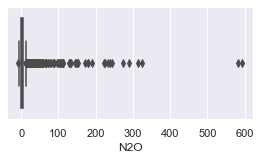

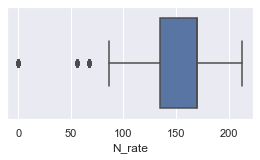

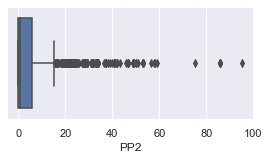

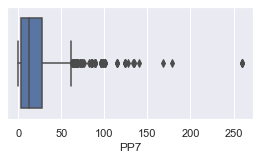

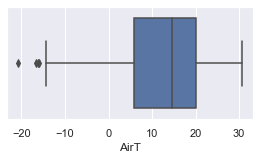

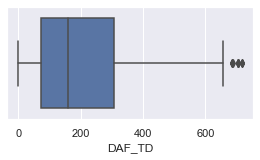

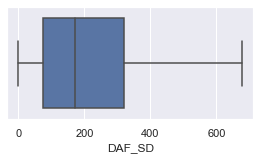

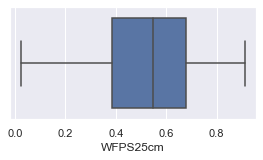

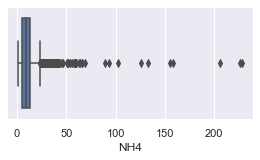

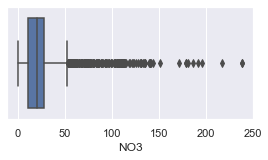

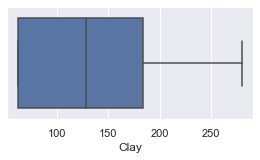

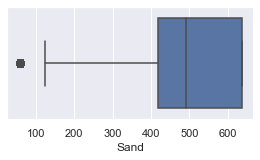

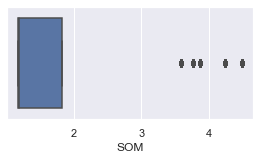

In [32]:
boxplot(df_num,df_num.columns)

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_trans = pd.DataFrame(data=pt.fit_transform(df_num.values),columns=df_num.columns)
df_trans.head()

N2O    N_rate       PP2       PP7      AirT    DAF_TD    DAF_SD  \
0  0.234689  0.481056 -0.954840 -1.662025 -1.508561  0.701551  0.467036   
1 -0.033784  0.481056 -0.954840 -1.662025 -1.540835  0.706764  0.472773   
2  0.185967  0.481056  0.701370 -0.165555 -1.312843  0.748076  0.518237   
3  0.157135  0.481056 -0.954840 -0.207986 -1.651473  0.753192  0.523866   
4  0.096829  0.481056  0.004098 -0.186111  0.537713  0.882670  0.666309   

   WFPS25cm       NH4       NO3      Clay      Sand       SOM  
0  0.802154  0.375458  0.270512 -0.991038  0.851278 -0.816932  
1  0.629330  0.370658  0.271470 -0.991038  0.851278 -0.816932  
2  1.228819  0.348267  0.284778 -0.991038  0.851278 -0.816932  
3  0.940786  0.350586  0.287301 -0.991038  0.851278 -0.816932  
4  1.144874  0.265162  0.333564 -0.991038  0.851278 -0.816932

<AxesSubplot:>

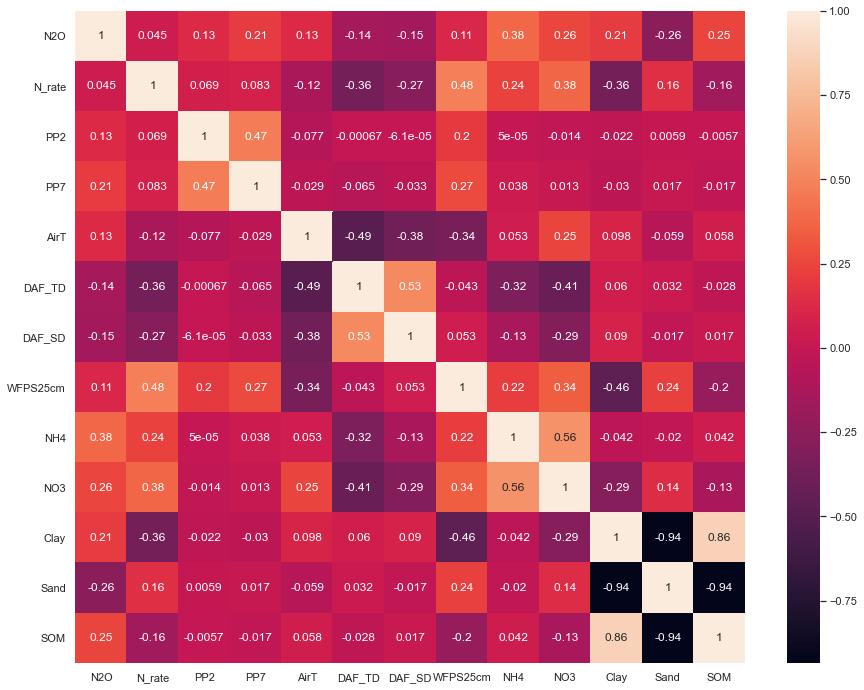

In [83]:
plt.figure(figsize=(15,12))
sns.heatmap(df_trans.corr(),annot=True)

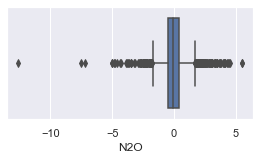

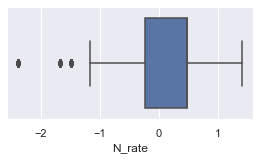

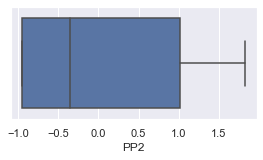

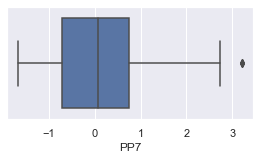

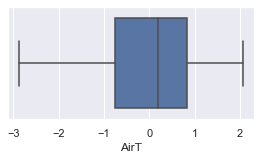

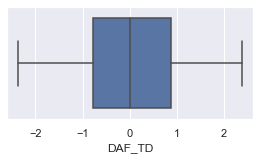

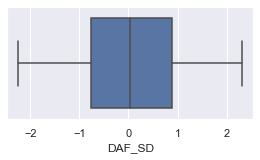

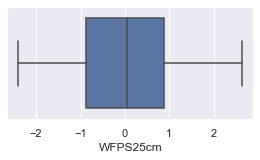

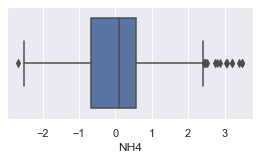

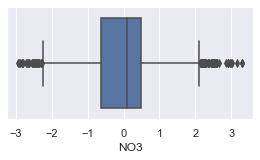

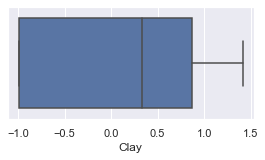

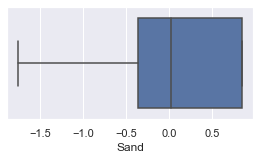

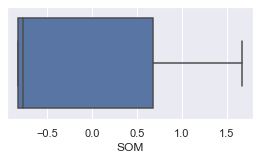

In [44]:
boxplot(df_trans,df_trans.columns)

In [45]:
df_final = pd.concat([df_trans,df_encode],axis=1)
df_final.head()

N2O    N_rate       PP2       PP7      AirT    DAF_TD    DAF_SD  \
0  0.234689  0.481056 -0.954840 -1.662025 -1.508561  0.701551  0.467036   
1 -0.033784  0.481056 -0.954840 -1.662025 -1.540835  0.706764  0.472773   
2  0.185967  0.481056  0.701370 -0.165555 -1.312843  0.748076  0.518237   
3  0.157135  0.481056 -0.954840 -0.207986 -1.651473  0.753192  0.523866   
4  0.096829  0.481056  0.004098 -0.186111  0.537713  0.882670  0.666309   

   WFPS25cm       NH4       NO3      Clay      Sand       SOM  \
0  0.802154  0.375458  0.270512 -0.991038  0.851278 -0.816932   
1  0.629330  0.370658  0.271470 -0.991038  0.851278 -0.816932   
2  1.228819  0.348267  0.284778 -0.991038  0.851278 -0.816932   
3  0.940786  0.350586  0.287301 -0.991038  0.851278 -0.816932   
4  1.144874  0.265162  0.333564 -0.991038  0.851278 -0.816932   

   Experiment_BCSE_KBS  Experiment_MCSE-T2  DataUse_Testing  Replication_R2  \
0                    1                   0                0               0   
1                    1                   0                0               0   
2                    1                   0                0               0   
3                    1                   0                0               0   
4                    1                   0                0               0   

   Replication_R3  Replication_R4  Replication_R5  Vegetation_GLYMX  \
0               0               0               0                 0   
1               0               0               0                 0   
2               0               0               0                 0   
3               0               0               0                 0   
4               0               0               0                 0   

   Vegetation_TRIAE  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [46]:
X = df_final.drop('N2O',axis=1)
y = df_final['N2O']

In [52]:
X.head()

N_rate       PP2       PP7      AirT    DAF_TD    DAF_SD  WFPS25cm  \
0  0.481056 -0.954840 -1.662025 -1.508561  0.701551  0.467036  0.802154   
1  0.481056 -0.954840 -1.662025 -1.540835  0.706764  0.472773  0.629330   
2  0.481056  0.701370 -0.165555 -1.312843  0.748076  0.518237  1.228819   
3  0.481056 -0.954840 -0.207986 -1.651473  0.753192  0.523866  0.940786   
4  0.481056  0.004098 -0.186111  0.537713  0.882670  0.666309  1.144874   

        NH4       NO3      Clay      Sand       SOM  Experiment_BCSE_KBS  \
0  0.375458  0.270512 -0.991038  0.851278 -0.816932                    1   
1  0.370658  0.271470 -0.991038  0.851278 -0.816932                    1   
2  0.348267  0.284778 -0.991038  0.851278 -0.816932                    1   
3  0.350586  0.287301 -0.991038  0.851278 -0.816932                    1   
4  0.265162  0.333564 -0.991038  0.851278 -0.816932                    1   

   Experiment_MCSE-T2  DataUse_Testing  Replication_R2  Replication_R3  \
0                   0                0               0               0   
1                   0                0               0               0   
2                   0                0               0               0   
3                   0                0               0               0   
4                   0                0               0               0   

   Replication_R4  Replication_R5  Vegetation_GLYMX  Vegetation_TRIAE  
0               0               0                 0                 0  
1               0               0                 0                 0  
2               0               0                 0                 0  
3               0               0                 0                 0  
4               0               0                 0                 0

In [53]:
y.head()

0    0.234689
1   -0.033784
2    0.185967
3    0.157135
4    0.096829
Name: N2O, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [61]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print('Train score: ',r2_train)
print('Test score: ',r2_test)

Train score:  0.301752464528973
Test score:  0.2829887180880435


In [62]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print('Train rmse: ',rmse_train)
print('test rmse: ',rmse_test)

Train rmse:  0.8113885853276009
test rmse:  0.9376156552327117


In [99]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [100]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print('Train score: ',r2_train)
print('Test score: ',r2_test)

Train score:  0.300480010221597
Test score:  0.27892529621291395


In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
r2_train_dt = r2_score(y_train,y_train_pred_dt)
r2_test_dt = r2_score(y_test,y_test_pred_dt)
print('train r2: ',r2_train_dt)
print('test r2: ',r2_test_dt)

train r2:  1.0
test r2:  0.33047635655602314


In [69]:
dt.min_samples_split

2

In [65]:
from sklearn.model_selection import GridSearchCV

In [78]:
tune_param = {'max_depth':[15,20,25],'min_samples_split':range(2,10) }
grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=10),param_grid=tune_param,cv=3,scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_split': range(2, 10)},
             scoring='r2')

In [79]:
grid.best_params_

{'max_depth': 25, 'min_samples_split': 9}

In [80]:
dt2 = DecisionTreeRegressor(max_depth=25,min_samples_split=9)
dt2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=25, min_samples_split=9)

In [81]:
y_pred_train_dt2 = dt2.predict(X_train)
y_pred_test_dt2 = dt2.predict(X_test)
r2_train_dt2 = r2_score(y_train,y_pred_train_dt2)
r2_test_dt2 = r2_score(y_test,y_pred_test_dt2)
print('TRain rmse: ',r2_train_dt2)
print('Test rmse: ',r2_test_dt2)

TRain rmse:  0.869531453807451
Test rmse:  0.3082797463262018


In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [85]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_train)
print('Test r2: ',r2_test)

Train r2:  0.6520751859488226
Test r2:  0.4377693752980655


In [95]:
tune_param = {'n_neighbors':range(3,31,2)}
grid = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=tune_param,cv=5,scoring='neg_root_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(3, 31, 2)},
             scoring='neg_root_mean_squared_error')

In [96]:
grid.best_params_

{'n_neighbors': 5}

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [98]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_train)
print('Test r2: ',r2_test)

Train r2:  0.9400963228462742
Test r2:  0.4807359383309724


In [101]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [102]:
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_train)
print('Test r2: ',r2_test)

Train r2:  0.487014763921349
Test r2:  0.4017538311618196


In [104]:
data = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
data.head()

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0 2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1 2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2 2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3 2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4 2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  Annual  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  Annual  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  Annual  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  Annual  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  Annual  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

<AxesSubplot:xlabel='Year', ylabel='N2O'>

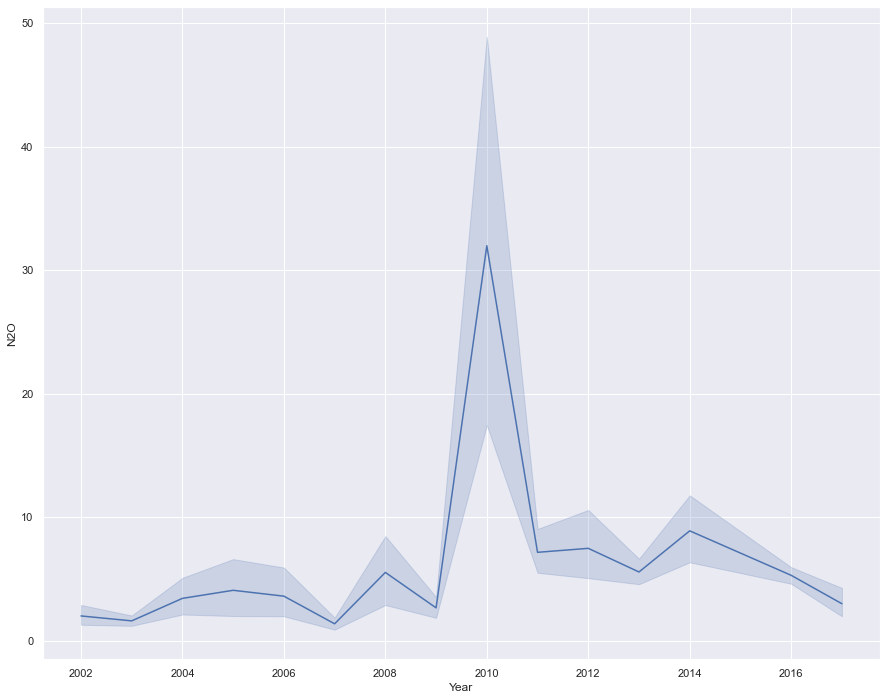

In [107]:
plt.figure(figsize=(15,12))
sns.lineplot(data['Year'],data['N2O'])

In [108]:
data.drop('Date',axis=1,inplace=True)

In [109]:
data.isnull().sum()

Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='WFPS25cm'>

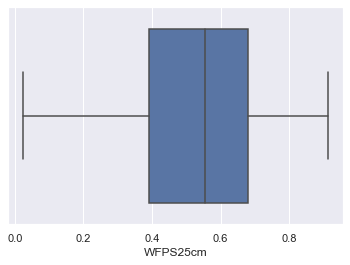

In [110]:
sns.boxplot(data['WFPS25cm'])

In [111]:
from sklearn.impute import SimpleImputer

In [114]:
imputer = SimpleImputer(strategy='mean')
data['WFPS25cm'] = imputer.fit_transform(np.array(data['WFPS25cm']).reshape(-1,1))

In [115]:
data.isnull().sum()

Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm        0
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='NH4'>

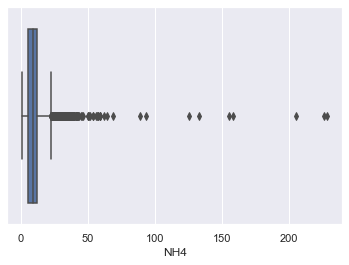

In [116]:
sns.boxplot(data['NH4'])

In [117]:
impute = SimpleImputer(strategy='median')
data['NH4'] = impute.fit_transform(np.array(data['NH4']).reshape(-1,1))

In [118]:
data.isnull().sum()

Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm        0
NH4             0
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='NO3'>

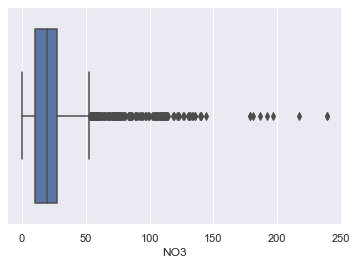

In [119]:
sns.boxplot(data['NO3'])

In [120]:
impute = SimpleImputer(strategy='median')
data['NO3'] = impute.fit_transform(np.array(data['NO3']).reshape(-1,1))

In [121]:
data.isnull().sum()

Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [122]:
data_cat = data.select_dtypes(exclude=np.number)
data_num = data.select_dtypes(include=np.number)

In [123]:
data_cat.head()

Experiment   DataUse Replication     Month Vegetation VegType
0   BCSE_KBS  Building          R1  February       Corn  Annual
1   BCSE_KBS  Building          R1  February       Corn  Annual
2   BCSE_KBS  Building          R1  February       Corn  Annual
3   BCSE_KBS  Building          R1  February       Corn  Annual
4   BCSE_KBS  Building          R1     March       Corn  Annual

In [125]:
for i in data_cat.columns:
    print(i)
    print(data_cat[i].value_counts())
    print('-'*25)
    print()

Experiment
BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Testing      670
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         285
June         271
September    252
May          239
April        222
August       222
October      175
November     169
March        146
January       96
December      89
February      80
Name: Month, dtype: int64
-------------------------

Vegetation
Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64
-------------------------

VegType
Annual    2246
Name: VegType, dtype: int64
-------------------------



In [126]:
data_cat.drop('VegType',axis=1,inplace=True)

In [127]:
data_encode = pd.get_dummies(data_cat,drop_first=True)
data_encode.head()

Experiment_BCSE_KBS  Experiment_MCSE-T2  DataUse_Testing  Replication_R2  \
0                    1                   0                0               0   
1                    1                   0                0               0   
2                    1                   0                0               0   
3                    1                   0                0               0   
4                    1                   0                0               0   

   Replication_R3  Replication_R4  Replication_R5  Month_August  \
0               0               0               0             0   
1               0               0               0             0   
2               0               0               0             0   
3               0               0               0             0   
4               0               0               0             0   

   Month_December  Month_February  Month_January  Month_July  Month_June  \
0               0               1              0           0           0   
1               0               1              0           0           0   
2               0               1              0           0           0   
3               0               1              0           0           0   
4               0               0              0           0           0   

   Month_March  Month_May  Month_November  Month_October  Month_September  \
0            0          0               0              0                0   
1            0          0               0              0                0   
2            0          0               0              0                0   
3            0          0               0              0                0   
4            1          0               0              0                0   

   Vegetation_GLYMX  Vegetation_TRIAE  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [128]:
data_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

<AxesSubplot:>

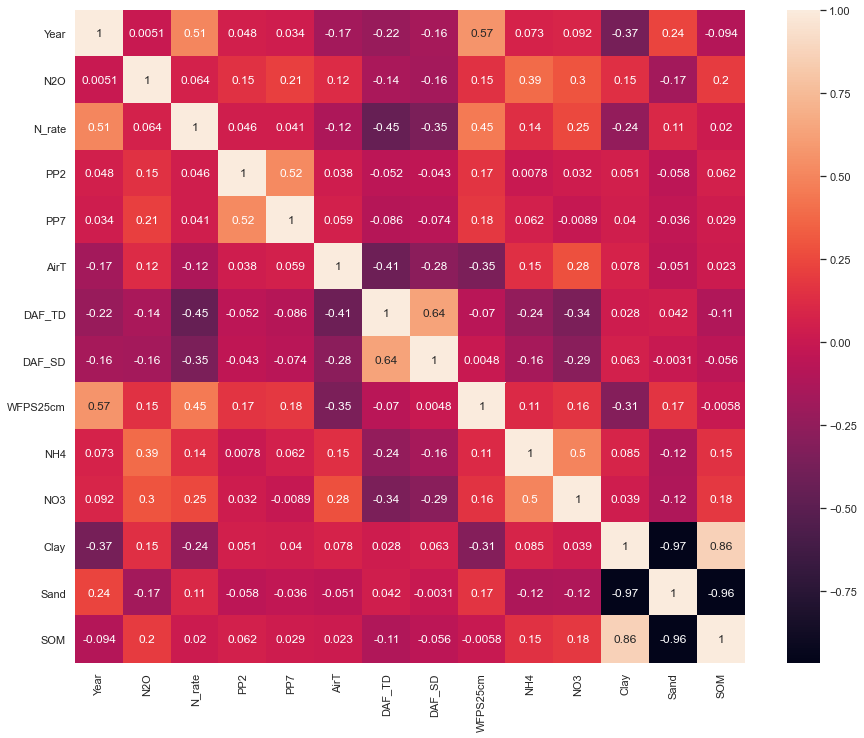

In [132]:
plt.figure(figsize=(15,12))
sns.heatmap(data_num.corr(),annot=True)

In [133]:
data_num.drop('Sand',axis=1,inplace=True)

<AxesSubplot:>

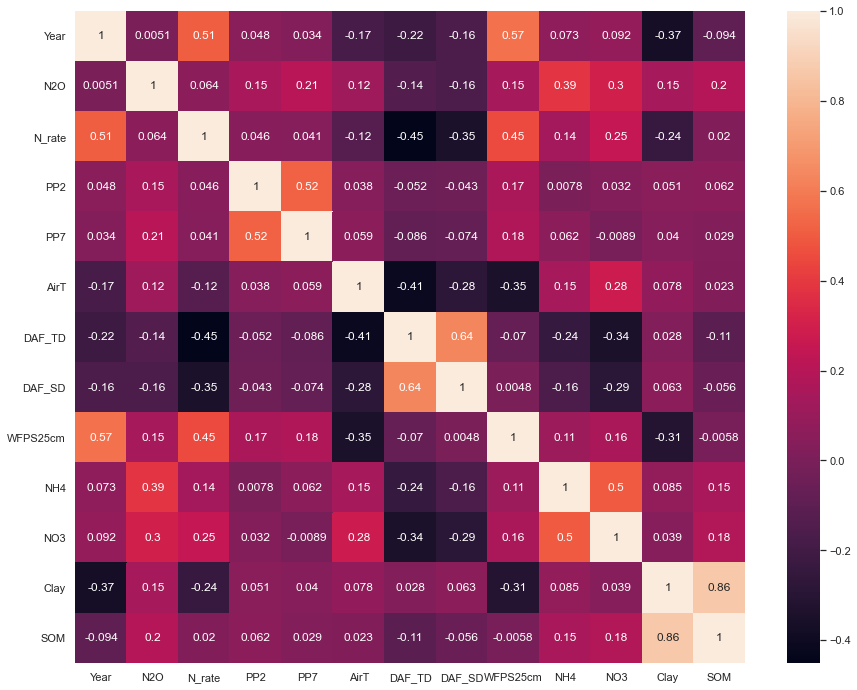

In [134]:
plt.figure(figsize=(15,12))
sns.heatmap(data_num.corr(),annot=True)

In [137]:
data_num.drop(['DAF_TD','DAF_SD'],axis=1,inplace=True)

<AxesSubplot:>

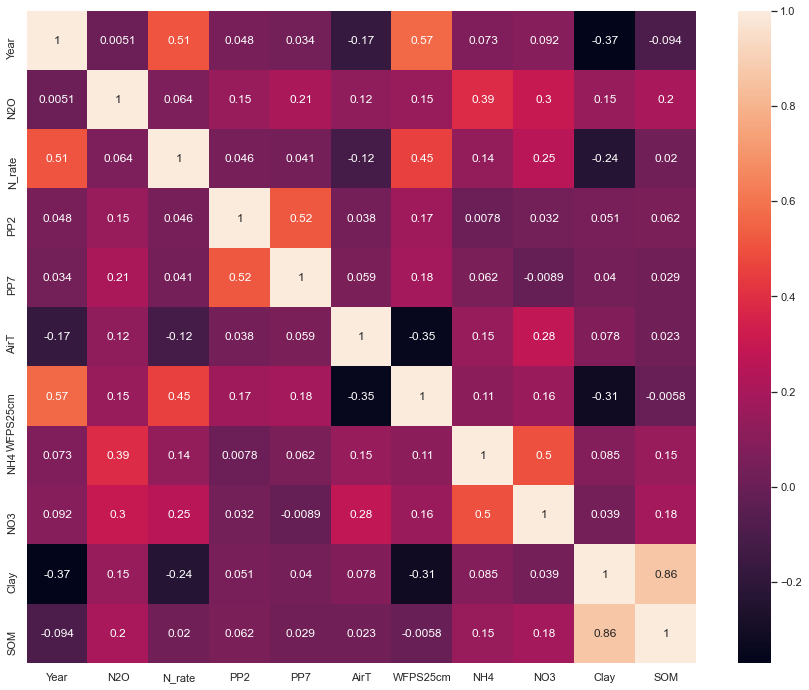

In [138]:
plt.figure(figsize=(15,12))
sns.heatmap(data_num.corr(),annot=True)

In [139]:
data_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  WFPS25cm        NH4        NO3  \
0  2012  3.896742     170  0.00  0.00  -2.0  0.666508  11.046340  22.940812   
1  2012  2.190218     170  0.00  0.00  -2.4  0.640608  11.008087  22.959578   
2  2012  3.542594     170  3.30  8.64   0.3  0.728085  10.831669  23.221928   
3  2012  3.342870     170  0.00  8.13  -3.8  0.686872  10.849792  23.271978   
4  2012  2.947778     170  1.02  8.39  17.6  0.716221  10.204748  24.206855   

   Clay       SOM  
0  62.5  1.174072  
1  62.5  1.174072  
2  62.5  1.174072  
3  62.5  1.174072  
4  62.5  1.174072

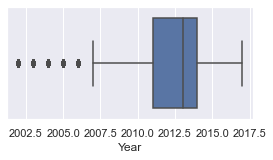

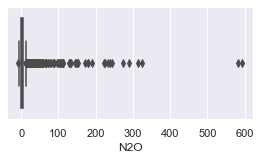

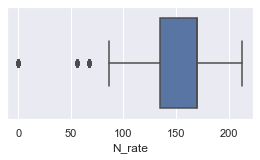

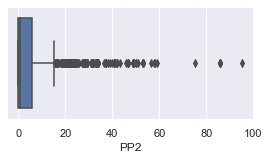

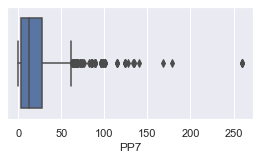

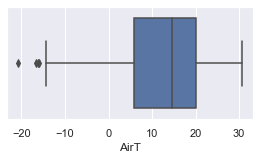

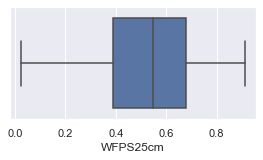

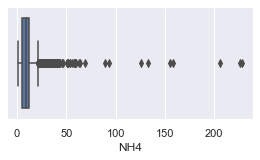

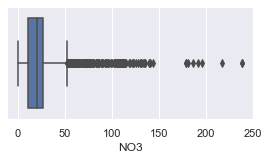

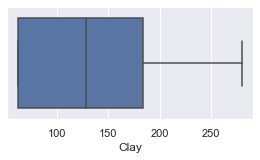

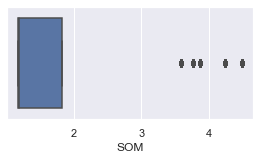

In [140]:
boxplot(data_num,data_num.columns)

In [141]:
data_num.shape

(2246, 11)

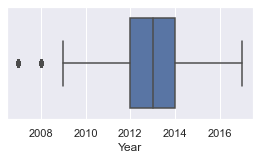

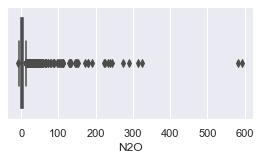

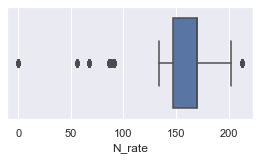

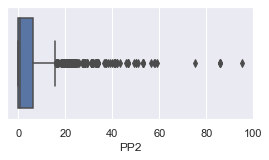

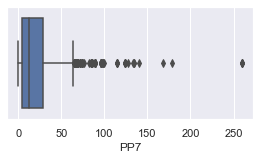

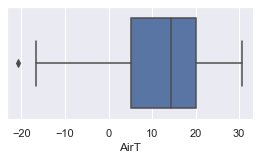

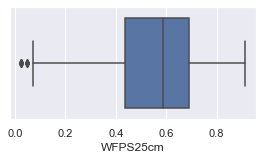

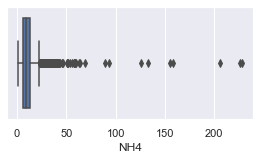

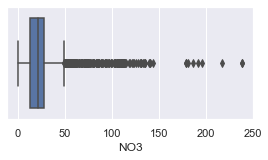

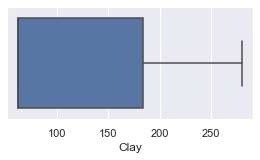

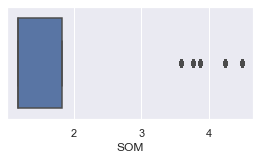

In [149]:
data_cut = data_num[data_num['Year']>2006]
boxplot(data_cut,data_cut.columns)

In [150]:
data_cut.head()

Year       N2O  N_rate   PP2   PP7  AirT  WFPS25cm        NH4        NO3  \
0  2012  3.896742     170  0.00  0.00  -2.0  0.666508  11.046340  22.940812   
1  2012  2.190218     170  0.00  0.00  -2.4  0.640608  11.008087  22.959578   
2  2012  3.542594     170  3.30  8.64   0.3  0.728085  10.831669  23.221928   
3  2012  3.342870     170  0.00  8.13  -3.8  0.686872  10.849792  23.271978   
4  2012  2.947778     170  1.02  8.39  17.6  0.716221  10.204748  24.206855   

   Clay       SOM  
0  62.5  1.174072  
1  62.5  1.174072  
2  62.5  1.174072  
3  62.5  1.174072  
4  62.5  1.174072

In [151]:
pt = PowerTransformer()
data_trans = pd.DataFrame(data=pt.fit_transform(data_cut.values),columns=data_cut.columns)
data_trans.head()

Year       N2O    N_rate       PP2       PP7      AirT  WFPS25cm  \
0 -0.437518  0.205414  0.371945 -0.956508 -1.699041 -1.438960  0.660464   
1 -0.437518 -0.053178  0.371945 -0.956508 -1.699041 -1.472431  0.464622   
2 -0.437518  0.158452  0.371945  0.674993 -0.207529 -1.238452  1.156767   
3 -0.437518  0.130668  0.371945 -0.956508 -0.250228 -1.587716  0.819749   
4 -0.437518  0.072570  0.371945 -0.017397 -0.228218  0.560676  1.057711   

        NH4       NO3      Clay       SOM  
0  0.326221  0.203435 -0.887005 -0.763717  
1  0.321299  0.204418 -0.887005 -0.763717  
2  0.298352  0.218089 -0.887005 -0.763717  
3  0.300728  0.220681 -0.887005 -0.763717  
4  0.213364  0.268232 -0.887005 -0.763717

In [166]:
data_trans.isnull().sum()

Year        0
N2O         0
N_rate      0
PP2         0
PP7         0
AirT        0
WFPS25cm    0
NH4         0
NO3         0
Clay        0
SOM         0
dtype: int64

In [152]:
data_fin = pd.concat([data_trans,data_encode],axis=1)
data_fin.head()

Year       N2O    N_rate       PP2       PP7      AirT  WFPS25cm  \
0 -0.437518  0.205414  0.371945 -0.956508 -1.699041 -1.438960  0.660464   
1 -0.437518 -0.053178  0.371945 -0.956508 -1.699041 -1.472431  0.464622   
2 -0.437518  0.158452  0.371945  0.674993 -0.207529 -1.238452  1.156767   
3 -0.437518  0.130668  0.371945 -0.956508 -0.250228 -1.587716  0.819749   
4 -0.437518  0.072570  0.371945 -0.017397 -0.228218  0.560676  1.057711   

        NH4       NO3      Clay       SOM  Experiment_BCSE_KBS  \
0  0.326221  0.203435 -0.887005 -0.763717                    1   
1  0.321299  0.204418 -0.887005 -0.763717                    1   
2  0.298352  0.218089 -0.887005 -0.763717                    1   
3  0.300728  0.220681 -0.887005 -0.763717                    1   
4  0.213364  0.268232 -0.887005 -0.763717                    1   

   Experiment_MCSE-T2  DataUse_Testing  Replication_R2  Replication_R3  \
0                   0                0               0               0   
1                   0                0               0               0   
2                   0                0               0               0   
3                   0                0               0               0   
4                   0                0               0               0   

   Replication_R4  Replication_R5  Month_August  Month_December  \
0               0               0             0               0   
1               0               0             0               0   
2               0               0             0               0   
3               0               0             0               0   
4               0               0             0               0   

   Month_February  Month_January  Month_July  Month_June  Month_March  \
0               1              0           0           0            0   
1               1              0           0           0            0   
2               1              0           0           0            0   
3               1              0           0           0            0   
4               0              0           0           0            1   

   Month_May  Month_November  Month_October  Month_September  \
0          0               0              0                0   
1          0               0              0                0   
2          0               0              0                0   
3          0               0              0                0   
4          0               0              0                0   

   Vegetation_GLYMX  Vegetation_TRIAE  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [169]:
data_fin.dropna(inplace=True)

In [171]:
data_fin.isnull().sum()

Year                   0
N2O                    0
N_rate                 0
PP2                    0
PP7                    0
AirT                   0
WFPS25cm               0
NH4                    0
NO3                    0
Clay                   0
SOM                    0
Experiment_BCSE_KBS    0
Experiment_MCSE-T2     0
DataUse_Testing        0
Replication_R2         0
Replication_R3         0
Replication_R4         0
Replication_R5         0
Month_August           0
Month_December         0
Month_February         0
Month_January          0
Month_July             0
Month_June             0
Month_March            0
Month_May              0
Month_November         0
Month_October          0
Month_September        0
Vegetation_GLYMX       0
Vegetation_TRIAE       0
dtype: int64

In [172]:
X = data_fin.drop('N2O',axis=1)
y = data_fin['N2O']

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Linear Regression

In [175]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
lr = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.6197289683451767


In [180]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.3628704571138215
Test r2:  0.17203249217033278


## Decision Tree

In [181]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
dt = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.693425532758592


In [183]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  1.0
Test r2:  0.3046612471501827


## SVR

In [184]:
from sklearn.svm import SVR
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
svr = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=svr, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.4929603943021384


In [185]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.5788411276320805
Test r2:  0.3246823652507256


## KNN

In [186]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
knn = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.5038196128789877


In [187]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.6681679200014714
Test r2:  0.3926210714370091


## Ridge

In [188]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
ridge = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=ridge, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.61964181452499


In [189]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.36243195464602196
Test r2:  0.17255510297350962


## Random Forest

In [190]:
df1 = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df1.head()

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0 2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1 2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2 2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3 2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4 2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  Annual  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  Annual  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  Annual  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  Annual  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  Annual  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [192]:
df_num = df1.select_dtypes(np.number)
df_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [193]:
df_cat = df1.select_dtypes(exclude=np.number)
df_cat.head()

Date Experiment   DataUse Replication     Month Vegetation VegType
0 2012-02-09   BCSE_KBS  Building          R1  February       Corn  Annual
1 2012-02-10   BCSE_KBS  Building          R1  February       Corn  Annual
2 2012-02-18   BCSE_KBS  Building          R1  February       Corn  Annual
3 2012-02-19   BCSE_KBS  Building          R1  February       Corn  Annual
4 2012-03-16   BCSE_KBS  Building          R1     March       Corn  Annual

In [194]:
df_cat.drop(['Date','VegType'],axis=1,inplace=True)
df_cat.head()

Experiment   DataUse Replication     Month Vegetation
0   BCSE_KBS  Building          R1  February       Corn
1   BCSE_KBS  Building          R1  February       Corn
2   BCSE_KBS  Building          R1  February       Corn
3   BCSE_KBS  Building          R1  February       Corn
4   BCSE_KBS  Building          R1     March       Corn

In [195]:
df_enc = pd.get_dummies(df_cat,drop_first=True)
df_enc.head()

Experiment_BCSE_KBS  Experiment_MCSE-T2  DataUse_Testing  Replication_R2  \
0                    1                   0                0               0   
1                    1                   0                0               0   
2                    1                   0                0               0   
3                    1                   0                0               0   
4                    1                   0                0               0   

   Replication_R3  Replication_R4  Replication_R5  Month_August  \
0               0               0               0             0   
1               0               0               0             0   
2               0               0               0             0   
3               0               0               0             0   
4               0               0               0             0   

   Month_December  Month_February  Month_January  Month_July  Month_June  \
0               0               1              0           0           0   
1               0               1              0           0           0   
2               0               1              0           0           0   
3               0               1              0           0           0   
4               0               0              0           0           0   

   Month_March  Month_May  Month_November  Month_October  Month_September  \
0            0          0               0              0                0   
1            0          0               0              0                0   
2            0          0               0              0                0   
3            0          0               0              0                0   
4            1          0               0              0                0   

   Vegetation_GLYMX  Vegetation_TRIAE  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [197]:
df_fin = pd.concat([df_num,df_enc],axis=1)
df_fin.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  Experiment_BCSE_KBS  \
0  11.046340  22.940812  62.5  637.5  1.174072                    1   
1  11.008087  22.959578  62.5  637.5  1.174072                    1   
2  10.831669  23.221928  62.5  637.5  1.174072                    1   
3  10.849792  23.271978  62.5  637.5  1.174072                    1   
4  10.204748  24.206855  62.5  637.5  1.174072                    1   

   Experiment_MCSE-T2  DataUse_Testing  Replication_R2  Replication_R3  \
0                   0                0               0               0   
1                   0                0               0               0   
2                   0                0               0               0   
3                   0                0               0               0   
4                   0                0               0               0   

   Replication_R4  Replication_R5  Month_August  Month_December  \
0               0               0             0               0   
1               0               0             0               0   
2               0               0             0               0   
3               0               0             0               0   
4               0               0             0               0   

   Month_February  Month_January  Month_July  Month_June  Month_March  \
0               1              0           0           0            0   
1               1              0           0           0            0   
2               1              0           0           0            0   
3               1              0           0           0            0   
4               0              0           0           0            1   

   Month_May  Month_November  Month_October  Month_September  \
0          0               0              0                0   
1          0               0              0                0   
2          0               0              0                0   
3          0               0              0                0   
4          0               0              0                0   

   Vegetation_GLYMX  Vegetation_TRIAE  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [201]:
df_fin.isnull().sum()

Year                    0
N2O                     0
N_rate                  0
PP2                     0
PP7                     0
AirT                    0
DAF_TD                  0
DAF_SD                  0
WFPS25cm               52
NH4                    76
NO3                    30
Clay                    0
Sand                    0
SOM                     0
Experiment_BCSE_KBS     0
Experiment_MCSE-T2      0
DataUse_Testing         0
Replication_R2          0
Replication_R3          0
Replication_R4          0
Replication_R5          0
Month_August            0
Month_December          0
Month_February          0
Month_January           0
Month_July              0
Month_June              0
Month_March             0
Month_May               0
Month_November          0
Month_October           0
Month_September         0
Vegetation_GLYMX        0
Vegetation_TRIAE        0
dtype: int64

In [208]:
imputer = SimpleImputer(strategy='mean')
df_fin['WFPS25cm'] = imputer.fit_transform(np.array(data['WFPS25cm']).reshape(-1,1))

In [209]:
imputer = SimpleImputer(strategy='mean')
df_fin['NH4'] = imputer.fit_transform(np.array(data['NH4']).reshape(-1,1))

In [210]:
imputer = SimpleImputer(strategy='mean')
df_fin['NO3'] = imputer.fit_transform(np.array(data['NO3']).reshape(-1,1))

In [211]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [212]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [213]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
rf = RandomForestRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-618.4824910139336


In [214]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.879550170862308
Test r2:  0.6957324977711247


In [215]:
pt = PowerTransformer()
df_num = pd.DataFrame(data=pt.fit_transform(df_num),columns=df_num.columns)
df_num.head()

Year       N2O    N_rate       PP2       PP7      AirT    DAF_TD  \
0 -0.020287  0.234689  0.481056 -0.954840 -1.662025 -1.508561  0.701551   
1 -0.020287 -0.033784  0.481056 -0.954840 -1.662025 -1.540835  0.706764   
2 -0.020287  0.185967  0.481056  0.701370 -0.165555 -1.312843  0.748076   
3 -0.020287  0.157135  0.481056 -0.954840 -0.207986 -1.651473  0.753192   
4 -0.020287  0.096829  0.481056  0.004098 -0.186111  0.537713  0.882670   

     DAF_SD  WFPS25cm       NH4       NO3      Clay      Sand       SOM  
0  0.467036  0.777430  0.402276  0.277726 -0.991038  0.851278 -0.816932  
1  0.472773  0.601559  0.397425  0.278688 -0.991038  0.851278 -0.816932  
2  0.518237  1.213805  0.374802  0.292057 -0.991038  0.851278 -0.816932  
3  0.523866  0.918883  0.377146  0.294592 -0.991038  0.851278 -0.816932  
4  0.666309  1.127712  0.290844  0.341071 -0.991038  0.851278 -0.816932

In [216]:
df_fin = pd.concat([df_num,df_enc],axis=1)
df_fin.head()

Year       N2O    N_rate       PP2       PP7      AirT    DAF_TD  \
0 -0.020287  0.234689  0.481056 -0.954840 -1.662025 -1.508561  0.701551   
1 -0.020287 -0.033784  0.481056 -0.954840 -1.662025 -1.540835  0.706764   
2 -0.020287  0.185967  0.481056  0.701370 -0.165555 -1.312843  0.748076   
3 -0.020287  0.157135  0.481056 -0.954840 -0.207986 -1.651473  0.753192   
4 -0.020287  0.096829  0.481056  0.004098 -0.186111  0.537713  0.882670   

     DAF_SD  WFPS25cm       NH4       NO3      Clay      Sand       SOM  \
0  0.467036  0.777430  0.402276  0.277726 -0.991038  0.851278 -0.816932   
1  0.472773  0.601559  0.397425  0.278688 -0.991038  0.851278 -0.816932   
2  0.518237  1.213805  0.374802  0.292057 -0.991038  0.851278 -0.816932   
3  0.523866  0.918883  0.377146  0.294592 -0.991038  0.851278 -0.816932   
4  0.666309  1.127712  0.290844  0.341071 -0.991038  0.851278 -0.816932   

   Experiment_BCSE_KBS  Experiment_MCSE-T2  DataUse_Testing  Replication_R2  \
0                    1                   0                0               0   
1                    1                   0                0               0   
2                    1                   0                0               0   
3                    1                   0                0               0   
4                    1                   0                0               0   

   Replication_R3  Replication_R4  Replication_R5  Month_August  \
0               0               0               0             0   
1               0               0               0             0   
2               0               0               0             0   
3               0               0               0             0   
4               0               0               0             0   

   Month_December  Month_February  Month_January  Month_July  Month_June  \
0               0               1              0           0           0   
1               0               1              0           0           0   
2               0               1              0           0           0   
3               0               1              0           0           0   
4               0               0              0           0           0   

   Month_March  Month_May  Month_November  Month_October  Month_September  \
0            0          0               0              0                0   
1            0          0               0              0                0   
2            0          0               0              0                0   
3            0          0               0              0                0   
4            1          0               0              0                0   

   Vegetation_GLYMX  Vegetation_TRIAE  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [217]:
df_fin.isnull().sum()

Year                    0
N2O                     0
N_rate                  0
PP2                     0
PP7                     0
AirT                    0
DAF_TD                  0
DAF_SD                  0
WFPS25cm               52
NH4                    76
NO3                    30
Clay                    0
Sand                    0
SOM                     0
Experiment_BCSE_KBS     0
Experiment_MCSE-T2      0
DataUse_Testing         0
Replication_R2          0
Replication_R3          0
Replication_R4          0
Replication_R5          0
Month_August            0
Month_December          0
Month_February          0
Month_January           0
Month_July              0
Month_June              0
Month_March             0
Month_May               0
Month_November          0
Month_October           0
Month_September         0
Vegetation_GLYMX        0
Vegetation_TRIAE        0
dtype: int64

In [218]:
imputer = SimpleImputer(strategy='mean')
df_fin['WFPS25cm'] = imputer.fit_transform(np.array(data['WFPS25cm']).reshape(-1,1))

In [219]:
imputer = SimpleImputer(strategy='mean')
df_fin['NH4'] = imputer.fit_transform(np.array(data['NH4']).reshape(-1,1))

In [220]:
imputer = SimpleImputer(strategy='mean')
df_fin['NO3'] = imputer.fit_transform(np.array(data['NO3']).reshape(-1,1))

In [221]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [224]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
rf = RandomForestRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.37410870885714687


In [225]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.9446238042822546
Test r2:  0.5473036811901328


In [226]:
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
knn = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.5962186097305376


In [228]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.5955649486962663
Test r2:  0.3534514352162794


## XGB

In [229]:
from xgboost import XGBRegressor
kfold = KFold(n_splits=10,random_state=None, shuffle=False)
xgb = XGBRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-0.4030392135568916


In [230]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_lr_train = r2_score(y_train,y_pred_train)
r2_lr_test = r2_score(y_test,y_pred_test)
print('Train r2: ',r2_lr_train)
print('Test r2: ',r2_lr_test)

Train r2:  0.9878951002059307
Test r2:  0.4679617365000013


In [231]:
df = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df.head()

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0 2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1 2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2 2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3 2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4 2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  Annual  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  Annual  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  Annual  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  Annual  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  Annual  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [232]:
df.drop(['Date','VegType'],axis=1,inplace=True)

In [233]:
df_num = df.select_dtypes(np.number)
df_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [234]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.head()

Experiment   DataUse Replication     Month Vegetation
0   BCSE_KBS  Building          R1  February       Corn
1   BCSE_KBS  Building          R1  February       Corn
2   BCSE_KBS  Building          R1  February       Corn
3   BCSE_KBS  Building          R1  February       Corn
4   BCSE_KBS  Building          R1     March       Corn

In [235]:
for i in df_cat.columns:
    print(i)
    print(df_cat[i].value_counts())
    print('-'*25)
    print()

Experiment
BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Testing      670
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         285
June         271
September    252
May          239
April        222
August       222
October      175
November     169
March        146
January       96
December      89
February      80
Name: Month, dtype: int64
-------------------------

Vegetation
Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64
-------------------------



In [236]:
replication = {'R1':1,'R2':2,'R3':3,'R4':4,'R5':5 }
df_cat['Replication'] = df_cat['Replication'].apply(lambda x:replication[x])
df_cat['Replication'].value_counts()

1    1350
2     268
3     266
4     265
5      97
Name: Replication, dtype: int64

In [238]:
month_name = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_num = [1,2,3,4,5,6,7,8,9,10,11,12]
month_dic = dict(zip(month_name,month_num))
df_cat['Month'] = df_cat['Month'].apply(lambda x:month_dic[x])
df_cat['Month'].value_counts()

7     285
6     271
9     252
5     239
8     222
4     222
10    175
11    169
3     146
1      96
12     89
2      80
Name: Month, dtype: int64

In [239]:
df_cat.head()

Experiment   DataUse  Replication  Month Vegetation
0   BCSE_KBS  Building            1      2       Corn
1   BCSE_KBS  Building            1      2       Corn
2   BCSE_KBS  Building            1      2       Corn
3   BCSE_KBS  Building            1      2       Corn
4   BCSE_KBS  Building            1      3       Corn

In [240]:
df_cat.drop('Experiment',axis=1,inplace=True)

In [241]:
df_cat1 = df_cat.select_dtypes(exclude=np.number)
df_cat1.head()

DataUse Vegetation
0  Building       Corn
1  Building       Corn
2  Building       Corn
3  Building       Corn
4  Building       Corn

In [242]:
df_num1 = df_cat.select_dtypes(np.number)
df_num1.head()

Replication  Month
0            1      2
1            1      2
2            1      2
3            1      2
4            1      3

In [243]:
df_encode = pd.get_dummies(df_cat1)
df_encode.head()

DataUse_Building  DataUse_Testing  Vegetation_Corn  Vegetation_GLYMX  \
0                 1                0                1                 0   
1                 1                0                1                 0   
2                 1                0                1                 0   
3                 1                0                1                 0   
4                 1                0                1                 0   

   Vegetation_TRIAE  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [244]:
df_fin = pd.concat([df_encode,df_num1,df_num],axis=1)
df_fin.head()

DataUse_Building  DataUse_Testing  Vegetation_Corn  Vegetation_GLYMX  \
0                 1                0                1                 0   
1                 1                0                1                 0   
2                 1                0                1                 0   
3                 1                0                1                 0   
4                 1                0                1                 0   

   Vegetation_TRIAE  Replication  Month  Year       N2O  N_rate   PP2   PP7  \
0                 0            1      2  2012  3.896742     170  0.00  0.00   
1                 0            1      2  2012  2.190218     170  0.00  0.00   
2                 0            1      2  2012  3.542594     170  3.30  8.64   
3                 0            1      2  2012  3.342870     170  0.00  8.13   
4                 0            1      3  2012  2.947778     170  1.02  8.39   

   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  Clay   Sand       SOM  
0  -2.0     276     241  0.666508  11.046340  22.940812  62.5  637.5  1.174072  
1  -2.4     277     242  0.640608  11.008087  22.959578  62.5  637.5  1.174072  
2   0.3     285     250  0.728085  10.831669  23.221928  62.5  637.5  1.174072  
3  -3.8     286     251  0.686872  10.849792  23.271978  62.5  637.5  1.174072  
4  17.6     312     277  0.716221  10.204748  24.206855  62.5  637.5  1.174072

In [245]:
df_fin.isnull().sum()

DataUse_Building     0
DataUse_Testing      0
Vegetation_Corn      0
Vegetation_GLYMX     0
Vegetation_TRIAE     0
Replication          0
Month                0
Year                 0
N2O                  0
N_rate               0
PP2                  0
PP7                  0
AirT                 0
DAF_TD               0
DAF_SD               0
WFPS25cm            52
NH4                 76
NO3                 30
Clay                 0
Sand                 0
SOM                  0
dtype: int64

In [246]:
df_fin['WFPS25cm'].fillna(df_fin['WFPS25cm'].mean(),inplace=True)
df_fin['NH4'].fillna(df_fin['NH4'].mean(),inplace=True)
df_fin['NO3'].fillna(df_fin['NO3'].mean(),inplace=True)

In [248]:
df_fin.isnull().sum()

DataUse_Building    0
DataUse_Testing     0
Vegetation_Corn     0
Vegetation_GLYMX    0
Vegetation_TRIAE    0
Replication         0
Month               0
Year                0
N2O                 0
N_rate              0
PP2                 0
PP7                 0
AirT                0
DAF_TD              0
DAF_SD              0
WFPS25cm            0
NH4                 0
NO3                 0
Clay                0
Sand                0
SOM                 0
dtype: int64

In [249]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [250]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [251]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [252]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('R2 train: ',r2_train)
print('R2 test: ',r2_test)

R2 train:  0.9983765112377235
R2 test:  0.6866147753132652


In [253]:
tune_param = {'max_depth':range(2,7),'n_estimators':[80,100,120,140] }
grid = GridSearchCV(estimator=XGBRegressor(),param_grid=tune_param,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [254]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 80}

In [255]:
xgb = XGBRegressor(max_depth=3,n_estimators=80)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [256]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('R2 train: ',r2_train)
print('R2 test: ',r2_test)

R2 train:  0.9507722369983524
R2 test:  0.5721054524962017


## Retrying....

In [3]:
df=pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')

In [4]:
df.head()

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0 2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1 2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2 2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3 2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4 2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  Annual  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  Annual  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  Annual  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  Annual  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  Annual  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [5]:
df.drop(['Date','VegType'],axis=1,inplace=True)

In [6]:
df.head()

Year Experiment   DataUse Replication     Month Vegetation       N2O  \
0  2012   BCSE_KBS  Building          R1  February       Corn  3.896742   
1  2012   BCSE_KBS  Building          R1  February       Corn  2.190218   
2  2012   BCSE_KBS  Building          R1  February       Corn  3.542594   
3  2012   BCSE_KBS  Building          R1  February       Corn  3.342870   
4  2012   BCSE_KBS  Building          R1     March       Corn  2.947778   

   N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  \
0     170  0.00  0.00  -2.0     276     241  0.666508  11.046340  22.940812   
1     170  0.00  0.00  -2.4     277     242  0.640608  11.008087  22.959578   
2     170  3.30  8.64   0.3     285     250  0.728085  10.831669  23.221928   
3     170  0.00  8.13  -3.8     286     251  0.686872  10.849792  23.271978   
4     170  1.02  8.39  17.6     312     277  0.716221  10.204748  24.206855   

   Clay   Sand       SOM  
0  62.5  637.5  1.174072  
1  62.5  637.5  1.174072  
2  62.5  637.5  1.174072  
3  62.5  637.5  1.174072  
4  62.5  637.5  1.174072

<AxesSubplot:xlabel='Experiment', ylabel='N2O'>

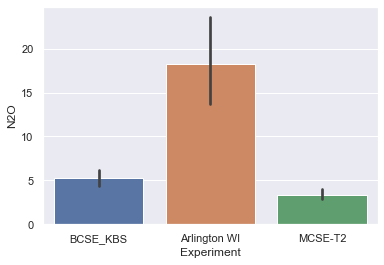

In [7]:
sns.barplot(df['Experiment'],df['N2O'])

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.54E+02'}, xlabel='NH4', ylabel='N2O'>,
         <AxesSubplot:title={'center':'F=1.44E+02'}, xlabel='NO3'>,
         <AxesSubplot:title={'center':'F=9.14E+01'}, xlabel='PP7'>,
         <AxesSubplot:title={'center':'F=7.93E+01'}, xlabel='PP2'>],
        [<AxesSubplot:title={'center':'F=7.70E+01'}, xlabel='SOM', ylabel='N2O'>,
         <AxesSubplot:title={'center':'F=7.23E+01'}, xlabel='DAF_SD'>,
         <AxesSubplot:title={'center':'F=5.81E+01'}, xlabel='Sand'>,
         <AxesSubplot:title={'center':'F=5.08E+01'}, xlabel='AirT'>],
        [<AxesSubplot:title={'center':'F=4.74E+01'}, xlabel='DAF_TD', ylabel='N2O'>,
         <AxesSubplot:title={'center':'F=3.56E+01'}, xlabel='Clay'>,
         <AxesSubplot:title={'center':'F=3.52E+01'}, xlabel='WFPS25cm'>,
         <AxesSubplot:title={'center':'F=5.06E+00'}, xlabel='Year'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=1.48E-01'}, xlabel='N2O', ylabel='Experiment'>,
         <Ax

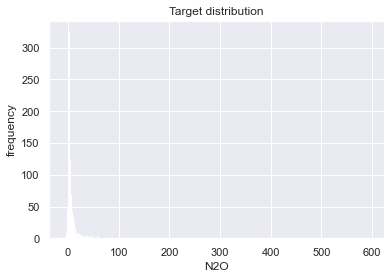

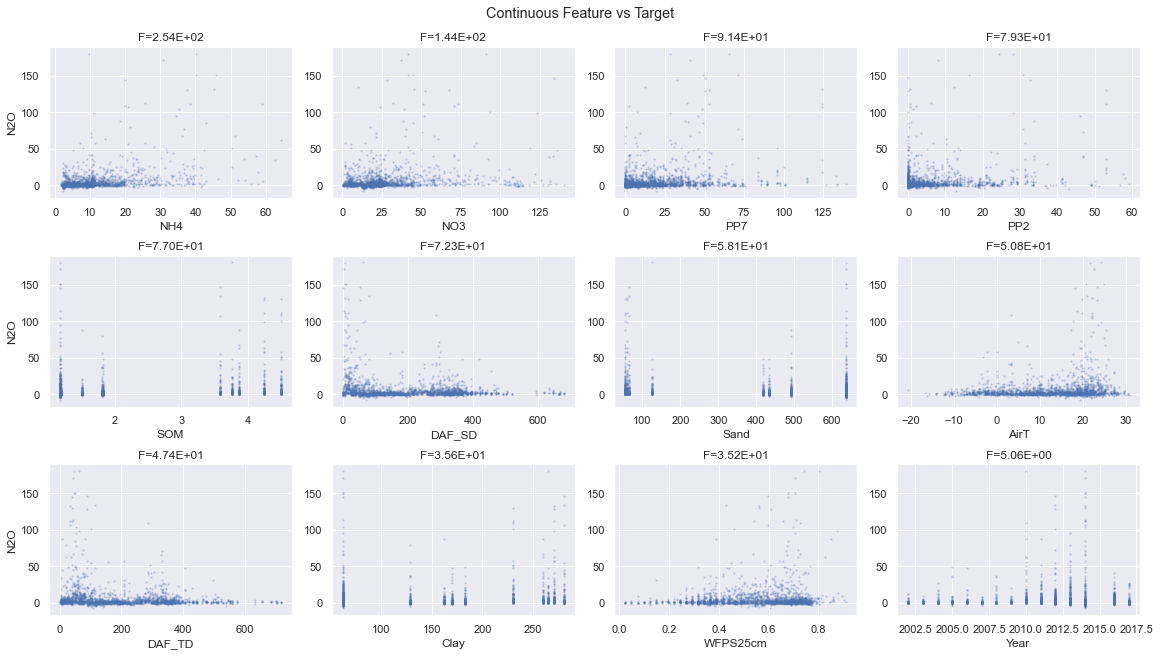

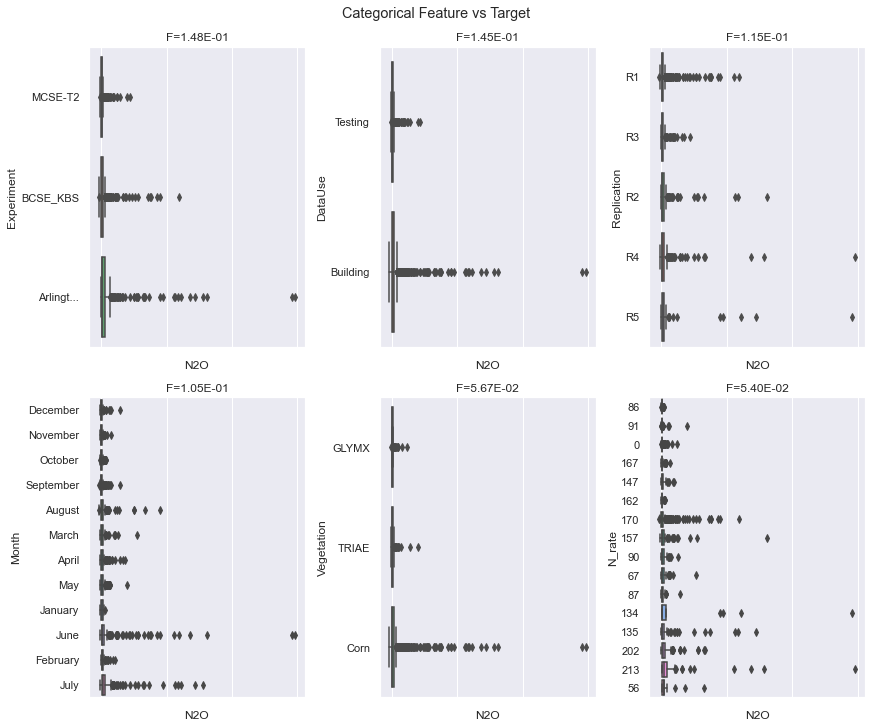

In [8]:
import dabl
dabl.plot(df,'N2O')

In [9]:
df_cat = df.select_dtypes(exclude=np.number)
df_num = df.select_dtypes(np.number)

In [10]:
df_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [11]:
df_num.isnull().sum()

Year         0
N2O          0
N_rate       0
PP2          0
PP7          0
AirT         0
DAF_TD       0
DAF_SD       0
WFPS25cm    52
NH4         76
NO3         30
Clay         0
Sand         0
SOM          0
dtype: int64

In [12]:
df_num['WFPS25cm'] = df_num['WFPS25cm'].fillna(df_num['WFPS25cm'].mean())
df_num['NH4'] = df_num['NH4'].fillna(df_num['NH4'].mean())
df_num['NO3'] = df_num['NO3'].fillna(df_num['NO3'].mean())

<AxesSubplot:>

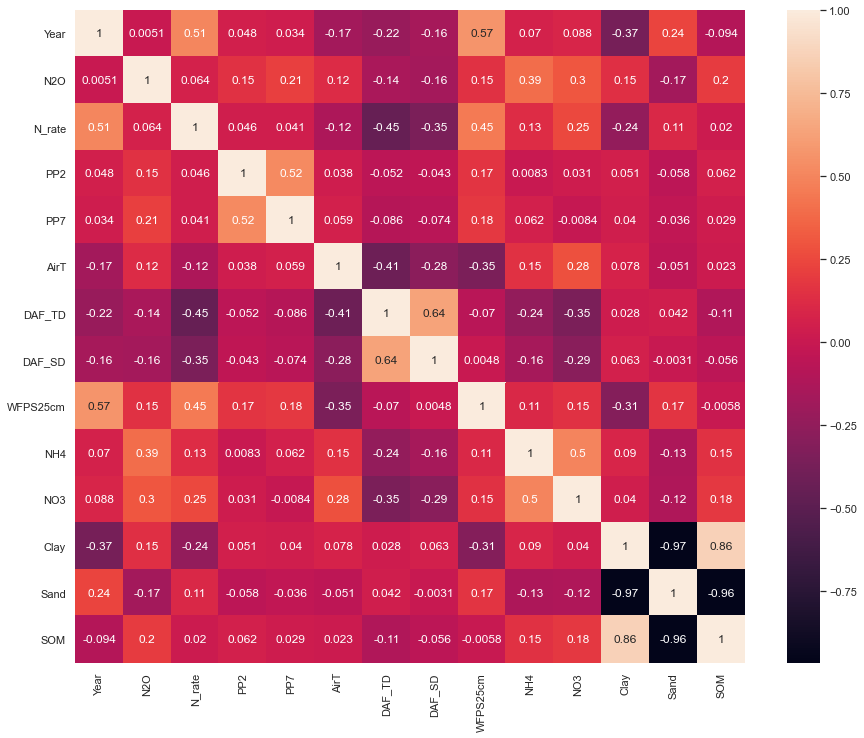

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df_num.corr(),annot=True)

In [14]:
df_num.drop('Sand',axis=1,inplace=True)
df_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay       SOM  
0  11.046340  22.940812  62.5  1.174072  
1  11.008087  22.959578  62.5  1.174072  
2  10.831669  23.221928  62.5  1.174072  
3  10.849792  23.271978  62.5  1.174072  
4  10.204748  24.206855  62.5  1.174072

<AxesSubplot:>

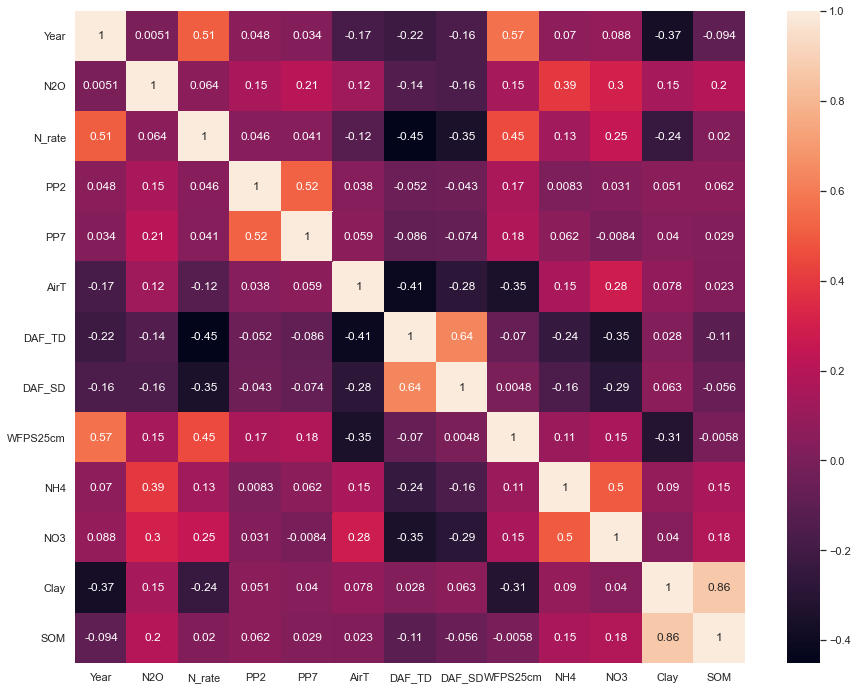

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(df_num.corr(),annot=True)

In [16]:
df_num.drop('SOM',axis=1,inplace=True)
df_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay  
0  11.046340  22.940812  62.5  
1  11.008087  22.959578  62.5  
2  10.831669  23.221928  62.5  
3  10.849792  23.271978  62.5  
4  10.204748  24.206855  62.5

<AxesSubplot:>

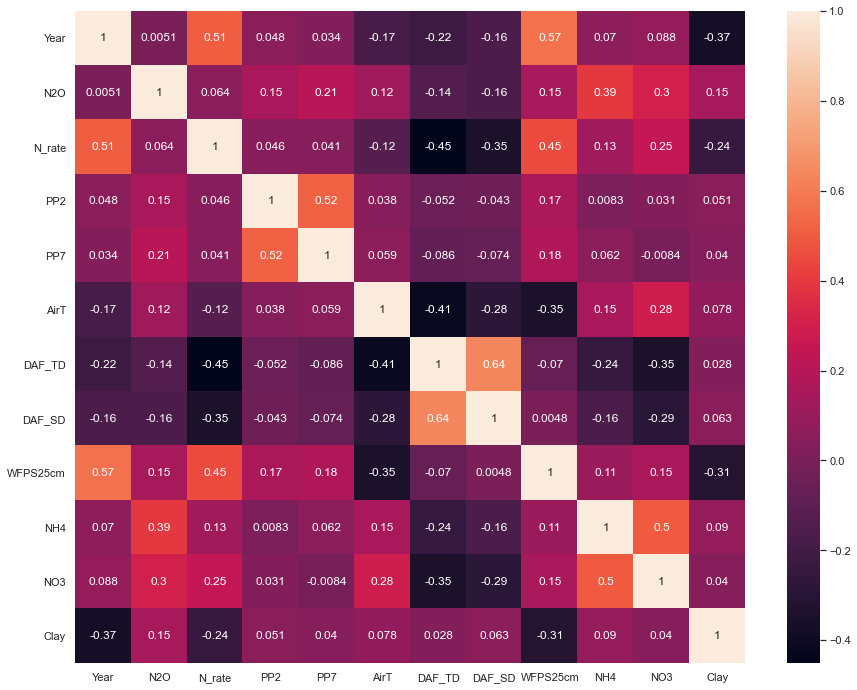

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df_num.corr(),annot=True)

In [18]:
df_cat.head()

Experiment   DataUse Replication     Month Vegetation
0   BCSE_KBS  Building          R1  February       Corn
1   BCSE_KBS  Building          R1  February       Corn
2   BCSE_KBS  Building          R1  February       Corn
3   BCSE_KBS  Building          R1  February       Corn
4   BCSE_KBS  Building          R1     March       Corn

In [19]:
df_cat.shape

(2246, 5)

In [20]:
df_cat['Experiment'].value_counts()

BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64

In [23]:
df_cat = df_cat[df_cat['Experiment']!='MCSE-T2']
df_cat.head()

Experiment   DataUse Replication     Month Vegetation
0   BCSE_KBS  Building          R1  February       Corn
1   BCSE_KBS  Building          R1  February       Corn
2   BCSE_KBS  Building          R1  February       Corn
3   BCSE_KBS  Building          R1  February       Corn
4   BCSE_KBS  Building          R1     March       Corn

In [24]:
df1 = pd.concat([df_cat,df_num],axis=1)
df1.head()

Experiment   DataUse Replication     Month Vegetation  Year       N2O  \
0   BCSE_KBS  Building          R1  February       Corn  2012  3.896742   
1   BCSE_KBS  Building          R1  February       Corn  2012  2.190218   
2   BCSE_KBS  Building          R1  February       Corn  2012  3.542594   
3   BCSE_KBS  Building          R1  February       Corn  2012  3.342870   
4   BCSE_KBS  Building          R1     March       Corn  2012  2.947778   

   N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  \
0     170  0.00  0.00  -2.0     276     241  0.666508  11.046340  22.940812   
1     170  0.00  0.00  -2.4     277     242  0.640608  11.008087  22.959578   
2     170  3.30  8.64   0.3     285     250  0.728085  10.831669  23.221928   
3     170  0.00  8.13  -3.8     286     251  0.686872  10.849792  23.271978   
4     170  1.02  8.39  17.6     312     277  0.716221  10.204748  24.206855   

   Clay  
0  62.5  
1  62.5  
2  62.5  
3  62.5  
4  62.5

In [25]:
df1.isnull().sum()

Experiment     670
DataUse        670
Replication    670
Month          670
Vegetation     670
Year             0
N2O              0
N_rate           0
PP2              0
PP7              0
AirT             0
DAF_TD           0
DAF_SD           0
WFPS25cm         0
NH4              0
NO3              0
Clay             0
dtype: int64

In [26]:
df1.shape

(2246, 17)

In [27]:
df1.dropna(axis=0,inplace=True)
df1.shape

(1576, 17)

In [28]:
df1.isnull().sum()

Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
Year           0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
dtype: int64

In [29]:
df1_cat = df1.select_dtypes(exclude=np.number)
df1_num = df1.select_dtypes(np.number)

In [30]:
df1_cat.head()

Experiment   DataUse Replication     Month Vegetation
0   BCSE_KBS  Building          R1  February       Corn
1   BCSE_KBS  Building          R1  February       Corn
2   BCSE_KBS  Building          R1  February       Corn
3   BCSE_KBS  Building          R1  February       Corn
4   BCSE_KBS  Building          R1     March       Corn

In [31]:
def unique_val(data):
    for i in data.columns:
        print(i)
        print(data[i].value_counts())
        print('-'*25)
        print()

In [32]:
unique_val(df1_cat)

Experiment
BCSE_KBS        1094
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1181
R4     100
R3      99
R2      99
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         190
June         180
September    167
August       158
May          151
October      133
April        123
November     118
March        114
January       89
December      85
February      68
Name: Month, dtype: int64
-------------------------

Vegetation
Corn    1576
Name: Vegetation, dtype: int64
-------------------------



In [37]:
df1_cat.drop(['Vegetation','DataUse'],axis=1,inplace=True)
experiment = {'BCSE_KBS':1,'Arlington WI':2}
df1_cat['Experiment'] = df1_cat['Experiment'].apply(lambda x:experiment[x])
df1_cat['Replication'] = df1_cat['Replication'].apply(lambda x:x[1])
month = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,
         'November':11,'December':12}
df1_cat['Month'] = df1_cat['Month'].apply(lambda x:month[x])
df1_cat.head()

Experiment Replication  Month
0           1           1      2
1           1           1      2
2           1           1      2
3           1           1      2
4           1           1      3

In [39]:
df1_num.std()

Year          1.906771
N2O          33.507667
N_rate       30.154416
PP2          10.021091
PP7          20.949187
AirT         10.065309
DAF_TD      109.839777
DAF_SD      115.486063
WFPS25cm      0.123423
NH4          14.559350
NO3          26.823148
Clay         91.745541
dtype: float64

In [40]:
df1_new = pd.concat([df1_cat,df1_num],axis=1)
df1_new.head()

Experiment Replication  Month  Year       N2O  N_rate   PP2   PP7  AirT  \
0           1           1      2  2012  3.896742     170  0.00  0.00  -2.0   
1           1           1      2  2012  2.190218     170  0.00  0.00  -2.4   
2           1           1      2  2012  3.542594     170  3.30  8.64   0.3   
3           1           1      2  2012  3.342870     170  0.00  8.13  -3.8   
4           1           1      3  2012  2.947778     170  1.02  8.39  17.6   

   DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  Clay  
0     276     241  0.666508  11.046340  22.940812  62.5  
1     277     242  0.640608  11.008087  22.959578  62.5  
2     285     250  0.728085  10.831669  23.221928  62.5  
3     286     251  0.686872  10.849792  23.271978  62.5  
4     312     277  0.716221  10.204748  24.206855  62.5

In [41]:
df1_new.isnull().sum()

Experiment     0
Replication    0
Month          0
Year           0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
dtype: int64

In [47]:
df1_new.dtypes

Experiment       int64
Replication     object
Month            int64
Year             int64
N2O            float64
N_rate           int64
PP2            float64
PP7            float64
AirT           float64
DAF_TD           int64
DAF_SD           int64
WFPS25cm       float64
NH4            float64
NO3            float64
Clay           float64
dtype: object

In [48]:
df1_new['Replication'] = df1_new['Replication'].astype('int')
df1_new.dtypes

Experiment       int64
Replication      int64
Month            int64
Year             int64
N2O            float64
N_rate           int64
PP2            float64
PP7            float64
AirT           float64
DAF_TD           int64
DAF_SD           int64
WFPS25cm       float64
NH4            float64
NO3            float64
Clay           float64
dtype: object

In [49]:
X = df1_new.drop('N2O',axis=1)
y = df1_new['N2O']

In [50]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [56]:
from xgboost import XGBRegressor

In [57]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
from sklearn.metrics import r2_score
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.9993927488519505
r2_test:  0.32180858372799936


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [60]:
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.9014777164433734
r2_test:  0.20224879901897141


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [62]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.930846520408322
r2_test:  0.35189776856193433


In [66]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [67]:
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  0.2698915821799638
r2_test:  -0.007163912674405415


In [68]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)

r2_train:  1.0
r2_test:  -0.10435854632609054


## Gradient boost

In [72]:
gb = GradientBoostingRegressor(random_state=10)
gb.fit(X_train,y_train)

GradientBoostingRegressor(random_state=10)

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.930846520408322
r2_test:  0.35139414815636416
RMSE:  33.33663958420406


In [75]:
gb.max_depth

3

In [138]:
from sklearn.model_selection import GridSearchCV
tune_param = {'max_depth':[2,3,4,5,6], 'learning_rate':[0.08,0.09,0.1,0.2,0.3]}
grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=tune_param,cv=3,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.08, 0.09, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring='neg_mean_squared_error')

In [139]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

In [152]:
gb1 = GradientBoostingRegressor(random_state=10,learning_rate=0.1,max_depth=2)
gb1.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, random_state=10)

In [153]:
y_pred_train = gb1.predict(X_train)
y_pred_test = gb1.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.8356163773620651
r2_test:  0.3900000557297908
RMSE:  32.32929886827629


In [155]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [163]:
kfold = KFold(n_splits=10)
gb = GradientBoostingRegressor(random_state=10,learning_rate=0.1,max_depth=2)
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-897.3921625008227


In [164]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9993927488519505
r2_test:  0.32180858372799936
RMSE:  34.08847185510885


In [167]:
tune_param = {'learning_rate':[0.1,0.2,0.3,0.4,0.5], 'reg_lambda':[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2], 'n_estimators':[80,100,120,140]}
grid = GridSearchCV(estimator=XGBRegressor(),param_grid=tune_param,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [168]:
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 140, 'reg_lambda': 1.2}

In [169]:
xgb = XGBRegressor(learning_rate=0.5,n_estimators=140,reg_lambda=1.2)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1.2, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9999884319419265
r2_test:  0.3146070795626714
RMSE:  34.26898137830171


In [171]:
kfold = KFold(n_splits=10)
xgb = XGBRegressor(learning_rate=0.5,n_estimators=140,reg_lambda=1.2)
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-804.6965502250479


In [172]:
df1_new.shape

(1576, 15)

In [191]:
df1 = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx',sheet_name='Data')
df1.head()

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0 2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1 2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2 2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3 2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4 2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  Annual  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  Annual  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  Annual  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  Annual  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  Annual  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [192]:
df1.isnull().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

<AxesSubplot:xlabel='WFPS25cm', ylabel='Density'>

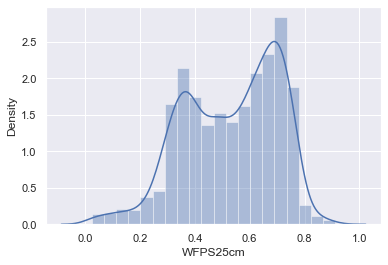

In [193]:
sns.distplot(df1['WFPS25cm'])

In [196]:
df1['WFPS25cm'] = df1['WFPS25cm'].fillna(df1['WFPS25cm'].mean())

<AxesSubplot:xlabel='NH4', ylabel='Density'>

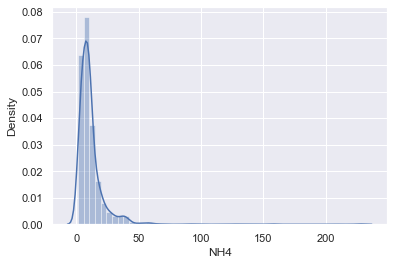

In [194]:
sns.distplot(df1['NH4'])

In [197]:
df1['NH4'] = df1['NH4'].fillna(df1['NH4'].median())

<AxesSubplot:xlabel='NO3', ylabel='Density'>

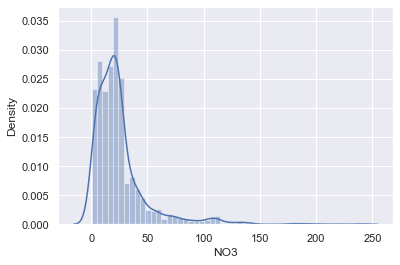

In [195]:
sns.distplot(df1['NO3'])

In [198]:
df1['NO3'] = df1['NO3'].fillna(df1['NO3'].median())

In [199]:
df1.isnull().sum()

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [200]:
df1.drop('Date',axis=1,inplace=True)

In [201]:
df1.head(2)

Year Experiment   DataUse Replication     Month Vegetation VegType  \
0  2012   BCSE_KBS  Building          R1  February       Corn  Annual   
1  2012   BCSE_KBS  Building          R1  February       Corn  Annual   

        N2O  N_rate  PP2  PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
0  3.896742     170  0.0  0.0  -2.0     276     241  0.666508  11.046340   
1  2.190218     170  0.0  0.0  -2.4     277     242  0.640608  11.008087   

         NO3  Clay   Sand       SOM  
0  22.940812  62.5  637.5  1.174072  
1  22.959578  62.5  637.5  1.174072

In [288]:
df1.head(2)

Year Experiment   DataUse Replication     Month Vegetation VegType  \
0  2012   BCSE_KBS  Building          R1  February       Corn  Annual   
1  2012   BCSE_KBS  Building          R1  February       Corn  Annual   

        N2O  N_rate  PP2  PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
0  3.896742     170  0.0  0.0  -2.0     276     241  0.666508  11.046340   
1  2.190218     170  0.0  0.0  -2.4     277     242  0.640608  11.008087   

         NO3  Clay   Sand       SOM  
0  22.940812  62.5  637.5  1.174072  
1  22.959578  62.5  637.5  1.174072

In [213]:
df_cat = df1.select_dtypes(exclude=np.number)
df_num = df1.select_dtypes(np.number)

In [214]:
df_cat.head(2)

Experiment   DataUse Replication     Month Vegetation VegType
0   BCSE_KBS  Building          R1  February       Corn  Annual
1   BCSE_KBS  Building          R1  February       Corn  Annual

In [215]:
df_num.head(2)

Year       N2O  N_rate  PP2  PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.0  0.0  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.0  0.0  -2.4     277     242  0.640608   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072

In [216]:
unique_val(df_cat)

Experiment
BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64
-------------------------

DataUse
Building    1576
Testing      670
Name: DataUse, dtype: int64
-------------------------

Replication
R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64
-------------------------

Month
July         285
June         271
September    252
May          239
April        222
August       222
October      175
November     169
March        146
January       96
December      89
February      80
Name: Month, dtype: int64
-------------------------

Vegetation
Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64
-------------------------

VegType
Annual    2246
Name: VegType, dtype: int64
-------------------------



In [217]:
df_cat.drop('VegType',axis=1,inplace=True)

In [218]:
experiment = {'BCSE_KBS':1,'MCSE-T2':2,'Arlington WI':3}
df_cat['Experiment'] = df_cat['Experiment'].apply(lambda x:experiment[x])

datause = {'Building':1,'Testing':2}
df_cat['DataUse'] = df_cat['DataUse'].apply(lambda x:datause[x])

df_cat['Replication'] = df_cat['Replication'].apply(lambda x:x[1])
df_cat['Replication'] = df_cat['Replication'].astype('int')

month = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
         'October':10,'November':11,'December':12}
df_cat['Month'] = df_cat['Month'].apply(lambda x:month[x])

vegetation = {'Corn':1,'GLYMX':2,'TRIAE':3}
df_cat['Vegetation'] = df_cat['Vegetation'].apply(lambda x:vegetation[x])

df_cat.head()

Experiment  DataUse  Replication  Month  Vegetation
0           1        1            1      2           1
1           1        1            1      2           1
2           1        1            1      2           1
3           1        1            1      2           1
4           1        1            1      3           1

In [219]:
df_fin = pd.concat([df_cat,df_num],axis=1)
df_fin.head()

Experiment  DataUse  Replication  Month  Vegetation  Year       N2O  \
0           1        1            1      2           1  2012  3.896742   
1           1        1            1      2           1  2012  2.190218   
2           1        1            1      2           1  2012  3.542594   
3           1        1            1      2           1  2012  3.342870   
4           1        1            1      3           1  2012  2.947778   

   N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  \
0     170  0.00  0.00  -2.0     276     241  0.666508  11.046340  22.940812   
1     170  0.00  0.00  -2.4     277     242  0.640608  11.008087  22.959578   
2     170  3.30  8.64   0.3     285     250  0.728085  10.831669  23.221928   
3     170  0.00  8.13  -3.8     286     251  0.686872  10.849792  23.271978   
4     170  1.02  8.39  17.6     312     277  0.716221  10.204748  24.206855   

   Clay   Sand       SOM  
0  62.5  637.5  1.174072  
1  62.5  637.5  1.174072  
2  62.5  637.5  1.174072  
3  62.5  637.5  1.174072  
4  62.5  637.5  1.174072

In [242]:
X = df_fin.drop('N2O',axis=1)
y = df_fin['N2O']

In [243]:
X.head()

Experiment  DataUse  Replication  Month  Vegetation  Year  N_rate   PP2  \
0           1        1            1      2           1  2012     170  0.00   
1           1        1            1      2           1  2012     170  0.00   
2           1        1            1      2           1  2012     170  3.30   
3           1        1            1      2           1  2012     170  0.00   
4           1        1            1      3           1  2012     170  1.02   

    PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  Clay   Sand  \
0  0.00  -2.0     276     241  0.666508  11.046340  22.940812  62.5  637.5   
1  0.00  -2.4     277     242  0.640608  11.008087  22.959578  62.5  637.5   
2  8.64   0.3     285     250  0.728085  10.831669  23.221928  62.5  637.5   
3  8.13  -3.8     286     251  0.686872  10.849792  23.271978  62.5  637.5   
4  8.39  17.6     312     277  0.716221  10.204748  24.206855  62.5  637.5   

        SOM  
0  1.174072  
1  1.174072  
2  1.174072  
3  1.174072  
4  1.174072

In [244]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [247]:
df_num.head()

Year       N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.00  0.00  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.00  0.00  -2.4     277     242  0.640608   
2  2012  3.542594     170  3.30  8.64   0.3     285     250  0.728085   
3  2012  3.342870     170  0.00  8.13  -3.8     286     251  0.686872   
4  2012  2.947778     170  1.02  8.39  17.6     312     277  0.716221   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072  
3  10.849792  23.271978  62.5  637.5  1.174072  
4  10.204748  24.206855  62.5  637.5  1.174072

In [289]:
df_cat = df1.select_dtypes(exclude=np.number)
df_cat.head()

Experiment   DataUse Replication     Month Vegetation VegType
0   BCSE_KBS  Building          R1  February       Corn  Annual
1   BCSE_KBS  Building          R1  February       Corn  Annual
2   BCSE_KBS  Building          R1  February       Corn  Annual
3   BCSE_KBS  Building          R1  February       Corn  Annual
4   BCSE_KBS  Building          R1     March       Corn  Annual

In [290]:
df_cat.drop('VegType',axis=1,inplace=True)
df_cat.isnull().sum().sum()

0

In [291]:
df_num = df1.select_dtypes(np.number)
df_num.head(2)

Year       N2O  N_rate  PP2  PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
0  2012  3.896742     170  0.0  0.0  -2.0     276     241  0.666508   
1  2012  2.190218     170  0.0  0.0  -2.4     277     242  0.640608   

         NH4        NO3  Clay   Sand       SOM  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072

In [292]:
df_num.drop('N2O',axis=1,inplace=True)

In [293]:
df_num.head(2)

Year  N_rate  PP2  PP7  AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
0  2012     170  0.0  0.0  -2.0     276     241  0.666508  11.046340   
1  2012     170  0.0  0.0  -2.4     277     242  0.640608  11.008087   

         NO3  Clay   Sand       SOM  
0  22.940812  62.5  637.5  1.174072  
1  22.959578  62.5  637.5  1.174072

In [294]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_trans = pd.DataFrame(data=pt.fit_transform(df_num.values),columns=df_num.columns)
df_trans.head()

Year    N_rate       PP2       PP7      AirT    DAF_TD    DAF_SD  \
0 -0.020287  0.481056 -0.954840 -1.662025 -1.508561  0.701551  0.467036   
1 -0.020287  0.481056 -0.954840 -1.662025 -1.540835  0.706764  0.472773   
2 -0.020287  0.481056  0.701370 -0.165555 -1.312843  0.748076  0.518237   
3 -0.020287  0.481056 -0.954840 -0.207986 -1.651473  0.753192  0.523866   
4 -0.020287  0.481056  0.004098 -0.186111  0.537713  0.882670  0.666309   

   WFPS25cm       NH4       NO3      Clay      Sand       SOM  
0  0.788669  0.403899  0.277479 -0.991038  0.851278 -0.816932  
1  0.610707  0.398962  0.278448 -0.991038  0.851278 -0.816932  
2  1.230261  0.375936  0.291912 -0.991038  0.851278 -0.816932  
3  0.931808  0.378322  0.294465 -0.991038  0.851278 -0.816932  
4  1.143135  0.290494  0.341278 -0.991038  0.851278 -0.816932

In [295]:
df_fin = pd.concat([df_cat,df_trans],axis=1)
df_fin.head()

Experiment   DataUse Replication     Month Vegetation      Year    N_rate  \
0   BCSE_KBS  Building          R1  February       Corn -0.020287  0.481056   
1   BCSE_KBS  Building          R1  February       Corn -0.020287  0.481056   
2   BCSE_KBS  Building          R1  February       Corn -0.020287  0.481056   
3   BCSE_KBS  Building          R1  February       Corn -0.020287  0.481056   
4   BCSE_KBS  Building          R1     March       Corn -0.020287  0.481056   

        PP2       PP7      AirT    DAF_TD    DAF_SD  WFPS25cm       NH4  \
0 -0.954840 -1.662025 -1.508561  0.701551  0.467036  0.788669  0.403899   
1 -0.954840 -1.662025 -1.540835  0.706764  0.472773  0.610707  0.398962   
2  0.701370 -0.165555 -1.312843  0.748076  0.518237  1.230261  0.375936   
3 -0.954840 -0.207986 -1.651473  0.753192  0.523866  0.931808  0.378322   
4  0.004098 -0.186111  0.537713  0.882670  0.666309  1.143135  0.290494   

        NO3      Clay      Sand       SOM  
0  0.277479 -0.991038  0.851278 -0.816932  
1  0.278448 -0.991038  0.851278 -0.816932  
2  0.291912 -0.991038  0.851278 -0.816932  
3  0.294465 -0.991038  0.851278 -0.816932  
4  0.341278 -0.991038  0.851278 -0.816932

In [296]:
df_fin.to_csv('traineddata.csv')

In [251]:
X = df_fin.copy()
y.head()

0    3.896742
1    2.190218
2    3.542594
3    3.342870
4    2.947778
Name: N2O, dtype: float64

In [252]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [253]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [254]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9984087947648602
r2_test:  0.36219839116817665
RMSE:  34.560488441573945


In [255]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [256]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.5907035412265802
r2_test:  0.4224767299854465
RMSE:  32.886814634471236


In [257]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [258]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.21339399721385754
r2_test:  0.15352476132693926
RMSE:  39.814768580562


In [259]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [260]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  1.0
r2_test:  0.30446713301944284
RMSE:  36.09074899225307


In [261]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [262]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9322536040651639
r2_test:  0.3453685057523911
RMSE:  35.01349907603348


In [263]:
ada =AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [264]:
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.09278121627630576
r2_test:  0.32747592659380476
RMSE:  35.48877297803232


In [265]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [266]:
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)
print('r2_train: ',r2_train)
r2_test = r2_score(y_test,y_pred_test)
print('r2_test: ',r2_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE: ',rmse)

r2_train:  0.9061146370428388
r2_test:  0.46689122671832683
RMSE:  31.596936789715215


In [267]:
kfold = KFold(n_splits=10)
gb = GradientBoostingRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(results.mean())

-252.5584293469846


In [268]:
tune_param = {'learning_rate':[0.08,0.09,0.1,0.12,0.2], 'max_depth':range(2,10)}
grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=tune_param,cv=4,scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.08, 0.09, 0.1, 0.12, 0.2],
                         'max_depth': range(2, 10)},
             scoring='r2')

In [269]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3}

In [271]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [275]:
X.shape

(2246, 18)

In [282]:
train = np.array(X)
predicted = []
for i in range(len(train)):
    predicted.append(gb.predict(train[i].reshape(1,-1)))

In [283]:
pred_data = X.copy()
pred_data['Predicted N2O'] = np.array(predicted)
pred_data.head()

Experiment  DataUse  Replication  Month  Vegetation      Year    N_rate  \
0           1        1            1      2           1 -0.020287  0.481056   
1           1        1            1      2           1 -0.020287  0.481056   
2           1        1            1      2           1 -0.020287  0.481056   
3           1        1            1      2           1 -0.020287  0.481056   
4           1        1            1      3           1 -0.020287  0.481056   

        PP2       PP7      AirT    DAF_TD    DAF_SD  WFPS25cm       NH4  \
0 -0.954840 -1.662025 -1.508561  0.701551  0.467036  0.788669  0.403899   
1 -0.954840 -1.662025 -1.540835  0.706764  0.472773  0.610707  0.398962   
2  0.701370 -0.165555 -1.312843  0.748076  0.518237  1.230261  0.375936   
3 -0.954840 -0.207986 -1.651473  0.753192  0.523866  0.931808  0.378322   
4  0.004098 -0.186111  0.537713  0.882670  0.666309  1.143135  0.290494   

        NO3      Clay      Sand       SOM  Predicted N2O  
0  0.277479 -0.991038  0.851278 -0.816932       3.856255  
1  0.278448 -0.991038  0.851278 -0.816932       3.730034  
2  0.291912 -0.991038  0.851278 -0.816932       4.001924  
3  0.294465 -0.991038  0.851278 -0.816932       3.776700  
4  0.341278 -0.991038  0.851278 -0.816932       4.096457

In [284]:
import pickle
file = open('n2opredictor.pkl','wb')
pickle.dump(gb,file)
file.close()

In [6]:
l1 = [[1,2,3,4,5,6,7,8,9,10]]
arr = np.array(l1)
print(arr.shape)
print(arr)

(1, 10)
[[ 1  2  3  4  5  6  7  8  9 10]]


In [7]:
arr = arr.reshape(1,10)
print(arr.shape)
print(arr)

(1, 10)
[[ 1  2  3  4  5  6  7  8  9 10]]


## ---------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-darkgrid')

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_regression

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [9]:
soil_data = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx', sheet_name=1)
soil_data

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0    2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1    2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2    2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3    2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4    2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   
...         ...   ...        ...       ...         ...       ...        ...   
2241 2013-10-16  2013    MCSE-T2   Testing          R4   October      TRIAE   
2242 2013-11-15  2013    MCSE-T2   Testing          R1  November      TRIAE   
2243 2013-11-15  2013    MCSE-T2   Testing          R2  November      TRIAE   
2244 2013-11-15  2013    MCSE-T2   Testing          R3  November      TRIAE   
2245 2013-11-15  2013    MCSE-T2   Testing          R4  November      TRIAE   

     VegType       N2O  N_rate  ...   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm  \
0     Annual  3.896742     170  ...  0.00  -2.00     276     241  0.666508   
1     Annual  2.190218     170  ...  0.00  -2.40     277     242  0.640608   
2     Annual  3.542594     170  ...  8.64   0.30     285     250  0.728085   
3     Annual  3.342870     170  ...  8.13  -3.80     286     251  0.686872   
4     Annual  2.947778     170  ...  8.39  17.60     312     277  0.716221   
...      ...       ...     ...  ...   ...    ...     ...     ...       ...   
2241  Annual  1.640000      91  ...  8.13  10.81     167     167  0.390203   
2242  Annual  0.990000      91  ...  8.13   5.64     197     197  0.317040   
2243  Annual -0.200000      91  ...  8.13   5.64     197     197  0.341428   
2244  Annual  0.300000      91  ...  8.13   5.64     197     197  0.365815   
2245  Annual  0.400000      91  ...  8.13   5.64     197     197  0.341428   

            NH4        NO3        Clay        Sand       SOM  
0     11.046340  22.940812   62.500000  637.500000  1.174072  
1     11.008087  22.959578   62.500000  637.500000  1.174072  
2     10.831669  23.221928   62.500000  637.500000  1.174072  
3     10.849792  23.271978   62.500000  637.500000  1.174072  
4     10.204748  24.206855   62.500000  637.500000  1.174072  
...         ...        ...         ...         ...       ...  
2241  17.061793   5.803681  128.333333  491.666667  1.806000  
2242   5.624730   5.429873  162.500000  490.375000  1.496400  
2243   3.504328   7.239000  183.250000  432.875000  1.186800  
2244   3.636931   8.434294  169.833333  418.833333  1.823200  
2245   7.376583   6.645088  128.333333  491.666667  1.806000  

[2246 rows x 21 columns]

In [10]:
soil_data.shape

(2246, 21)

In [11]:
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2246 non-null   datetime64[ns]
 1   Year         2246 non-null   int64         
 2   Experiment   2246 non-null   object        
 3   DataUse      2246 non-null   object        
 4   Replication  2246 non-null   object        
 5   Month        2246 non-null   object        
 6   Vegetation   2246 non-null   object        
 7   VegType      2246 non-null   object        
 8   N2O          2246 non-null   float64       
 9   N_rate       2246 non-null   int64         
 10  PP2          2246 non-null   float64       
 11  PP7          2246 non-null   float64       
 12  AirT         2246 non-null   float64       
 13  DAF_TD       2246 non-null   int64         
 14  DAF_SD       2246 non-null   int64         
 15  WFPS25cm     2194 non-null   float64       
 16  NH4   

In [12]:
soil_data.describe()

Year          N2O       N_rate          PP2          PP7  \
count  2246.000000  2246.000000  2246.000000  2246.000000  2246.000000   
mean   2011.925200     7.468610   142.994212     5.219839    19.245273   
std       3.617418    28.488257    56.130412    10.064123    23.723416   
min    2002.000000    -7.415297     0.000000     0.000000     0.000000   
25%    2011.000000     0.504316   135.000000     0.000000     3.560000   
50%    2013.000000     1.972058   170.000000     0.510000    11.930000   
75%    2014.000000     5.187618   170.000000     6.000000    27.000000   
max    2017.000000   593.072000   213.000000    95.250000   260.090000   

              AirT       DAF_TD       DAF_SD     WFPS25cm          NH4  \
count  2246.000000  2246.000000  2246.000000  2194.000000  2170.000000   
mean     12.408699   195.321015   198.898041     0.531047    11.451364   
std       9.490152   144.915448   142.907436     0.171868    13.214895   
min     -20.700000     1.000000     0.000000     0.024388     1.383393   
25%       5.940000    73.250000    75.000000     0.390203     5.290323   
50%      14.490000   160.000000   172.000000     0.553853     9.081282   
75%      20.070000   308.750000   320.000000     0.680321    12.140325   
max      30.700000   718.000000   678.000000     0.912113   228.525000   

               NO3         Clay         Sand          SOM  
count  2216.000000  2246.000000  2246.000000  2246.000000  
mean     24.997063   134.425163   462.686739     1.901503  
std      24.941785    79.564891   219.451957     1.132896  
min       0.370070    62.500000    55.000000     1.174072  
25%      10.184722    62.500000   418.833333     1.174072  
50%      19.795863   128.333333   491.666667     1.186800  
75%      27.085459   183.250000   637.500000     1.823200  
max     238.920000   280.000000   637.500000     4.500000

In [13]:
soil_data.isna().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

In [14]:
soil_data.nunique()

Date           1287
Year             15
Experiment        3
DataUse           2
Replication       5
Month            12
Vegetation        3
VegType           1
N2O            1846
N_rate           16
PP2             224
PP7             470
AirT            601
DAF_TD          424
DAF_SD          415
WFPS25cm       1577
NH4            2138
NO3            2192
Clay             10
Sand              9
SOM              11
dtype: int64

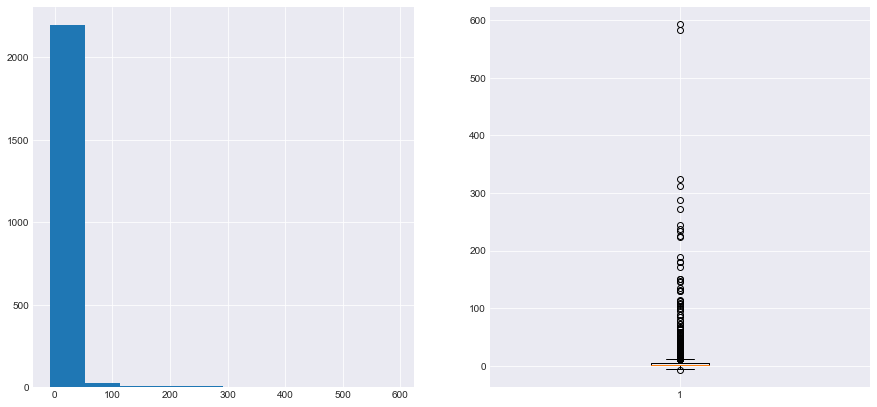

In [9]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = soil_data["N2O"]
ax1.hist(x)
ax2.boxplot(x);

In [15]:
soil_data.describe().columns[2:]

Index(['N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4',
       'NO3', 'Clay', 'Sand', 'SOM'],
      dtype='object')

In [16]:
unpivot = pd.melt(soil_data, soil_data.describe().columns[1], soil_data.describe().columns[2:])
unpivot

N2O variable     value
0      3.896742   N_rate  170.0000
1      2.190218   N_rate  170.0000
2      3.542594   N_rate  170.0000
3      3.342870   N_rate  170.0000
4      2.947778   N_rate  170.0000
...         ...      ...       ...
26947  1.640000      SOM    1.8060
26948  0.990000      SOM    1.4964
26949 -0.200000      SOM    1.1868
26950  0.300000      SOM    1.8232
26951  0.400000      SOM    1.8060

[26952 rows x 3 columns]

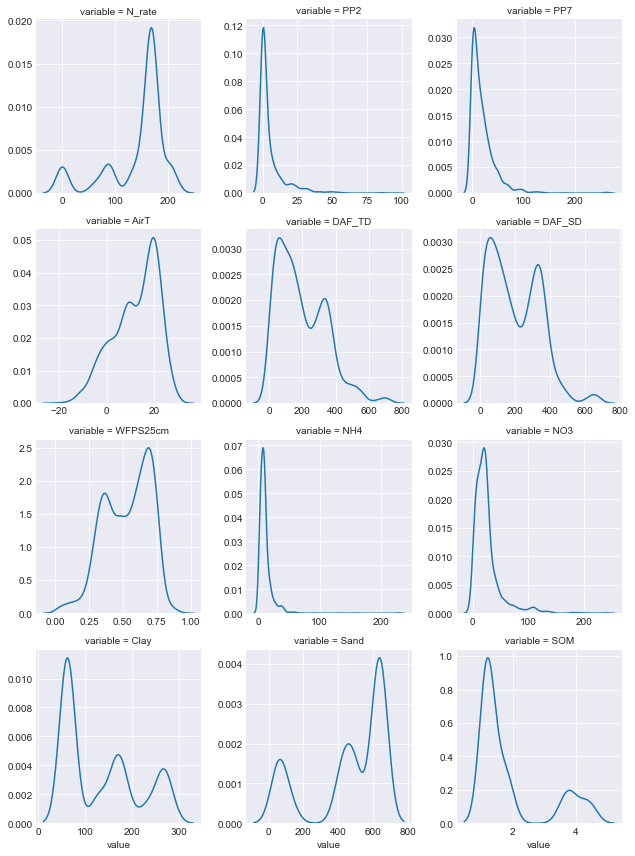

In [17]:
g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

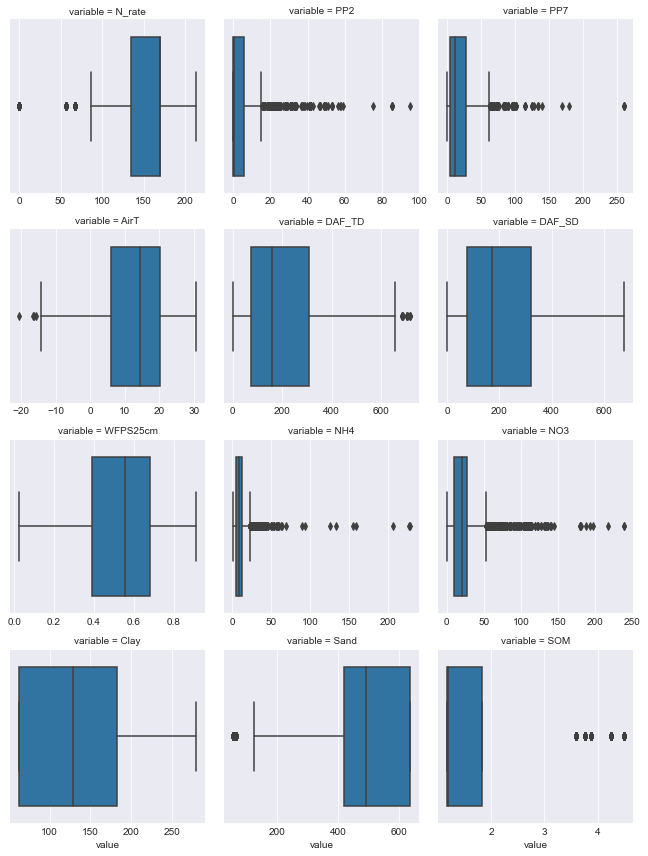

In [14]:
unpivot = pd.melt(soil_data, soil_data.describe().columns[1], soil_data.describe().columns[2:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [18]:
soil_data.fillna(soil_data.mean(), inplace=True)

<AxesSubplot:>

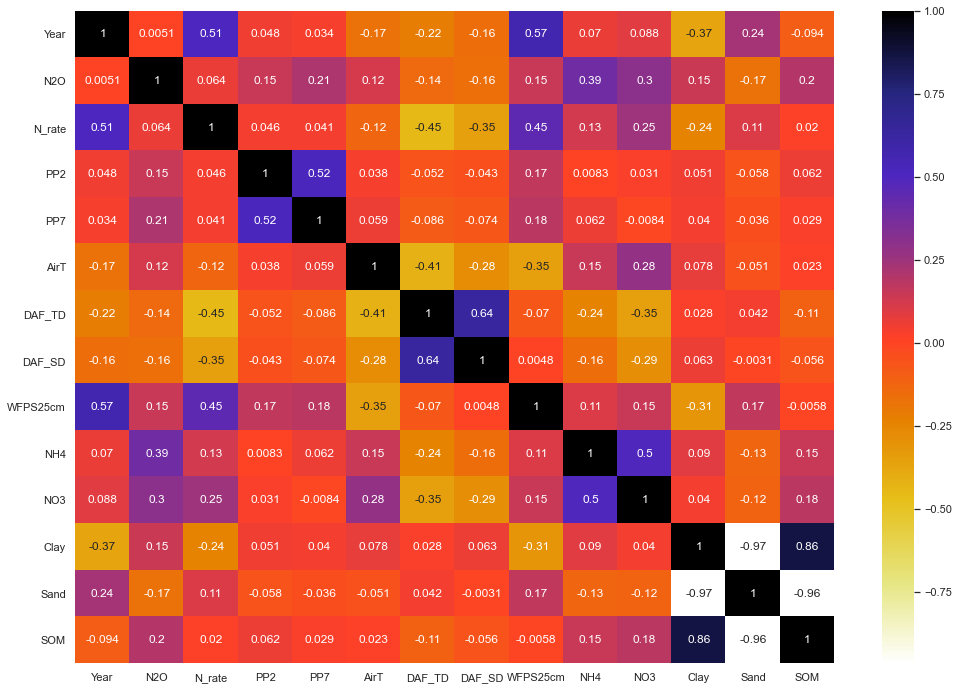

In [17]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(soil_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

<Figure size 1224x864 with 0 Axes>

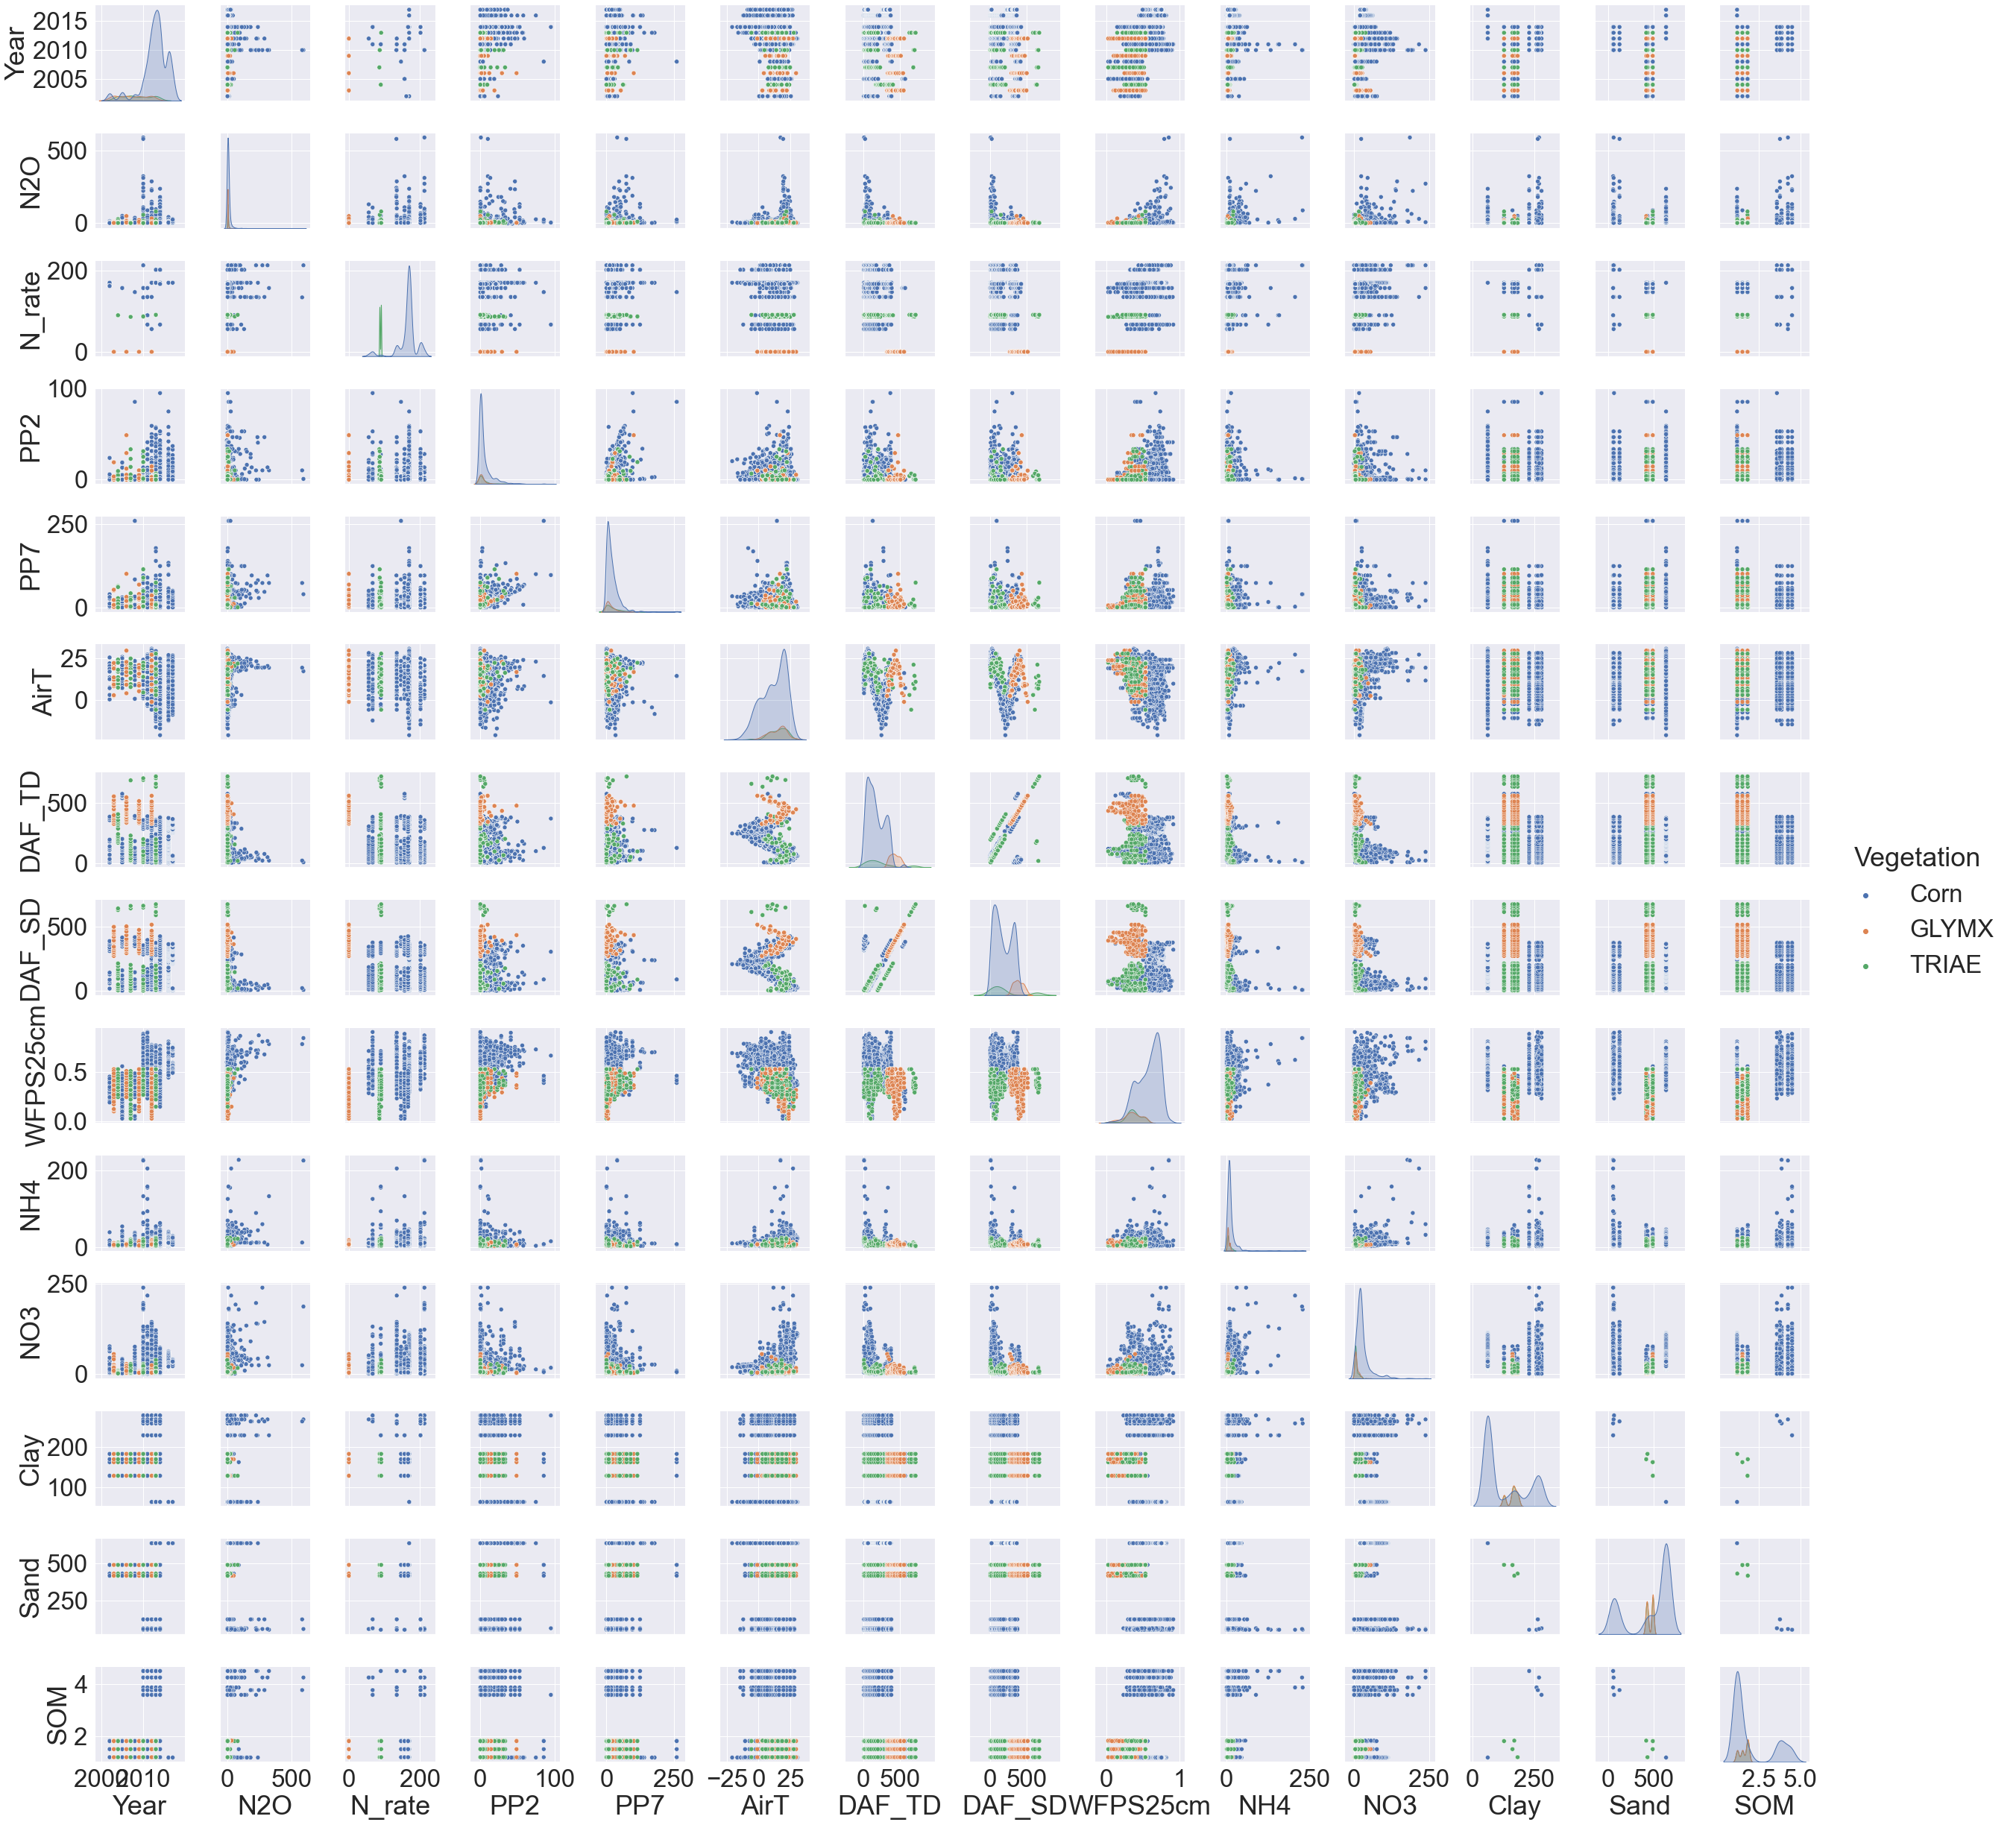

In [18]:
plt.figure(figsize=(17,12))
sns.set(font_scale=3)
sns.pairplot(soil_data, hue="Vegetation", diag_kind='kde')

<AxesSubplot:xlabel='Year', ylabel='N2O'>

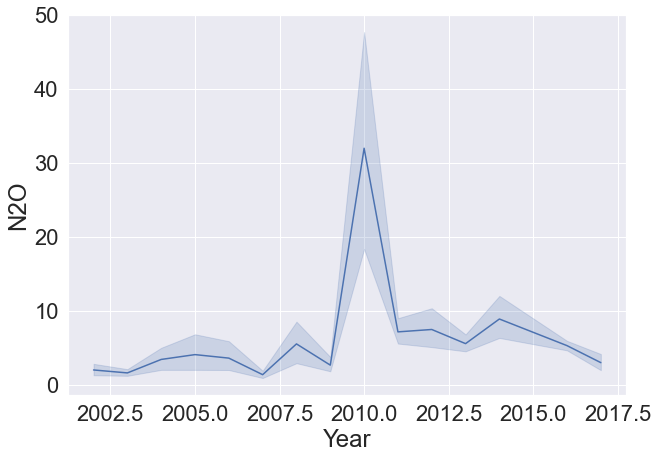

In [19]:
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
sns.lineplot(x=soil_data["Year"], y=soil_data["N2O"])

<AxesSubplot:xlabel='Month', ylabel='N2O'>

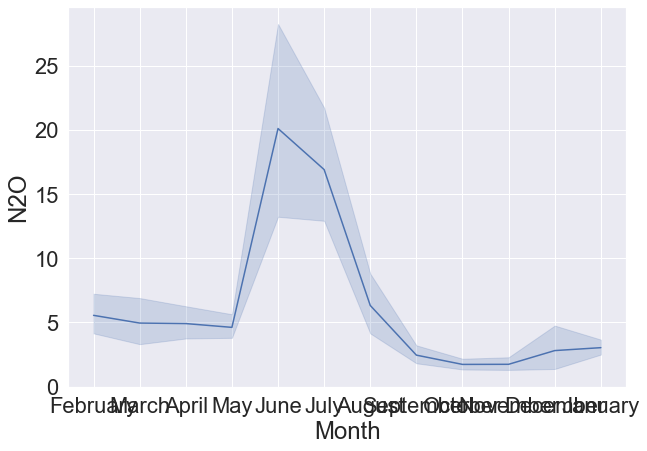

In [20]:
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
sns.lineplot(x=soil_data["Month"], y=soil_data["N2O"])

In [21]:
soil_data.drop(["VegType", "Sand", "Experiment"], axis=1, inplace=True)
soil_data

Date  Year   DataUse Replication     Month Vegetation       N2O  \
0    2012-02-09  2012  Building          R1  February       Corn  3.896742   
1    2012-02-10  2012  Building          R1  February       Corn  2.190218   
2    2012-02-18  2012  Building          R1  February       Corn  3.542594   
3    2012-02-19  2012  Building          R1  February       Corn  3.342870   
4    2012-03-16  2012  Building          R1     March       Corn  2.947778   
...         ...   ...       ...         ...       ...        ...       ...   
2241 2013-10-16  2013   Testing          R4   October      TRIAE  1.640000   
2242 2013-11-15  2013   Testing          R1  November      TRIAE  0.990000   
2243 2013-11-15  2013   Testing          R2  November      TRIAE -0.200000   
2244 2013-11-15  2013   Testing          R3  November      TRIAE  0.300000   
2245 2013-11-15  2013   Testing          R4  November      TRIAE  0.400000   

      N_rate   PP2   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
0        170  0.00  0.00  -2.00     276     241  0.666508  11.046340   
1        170  0.00  0.00  -2.40     277     242  0.640608  11.008087   
2        170  3.30  8.64   0.30     285     250  0.728085  10.831669   
3        170  0.00  8.13  -3.80     286     251  0.686872  10.849792   
4        170  1.02  8.39  17.60     312     277  0.716221  10.204748   
...      ...   ...   ...    ...     ...     ...       ...        ...   
2241      91  3.81  8.13  10.81     167     167  0.390203  17.061793   
2242      91  0.00  8.13   5.64     197     197  0.317040   5.624730   
2243      91  0.00  8.13   5.64     197     197  0.341428   3.504328   
2244      91  0.00  8.13   5.64     197     197  0.365815   3.636931   
2245      91  0.00  8.13   5.64     197     197  0.341428   7.376583   

            NO3        Clay       SOM  
0     22.940812   62.500000  1.174072  
1     22.959578   62.500000  1.174072  
2     23.221928   62.500000  1.174072  
3     23.271978   62.500000  1.174072  
4     24.206855   62.500000  1.174072  
...         ...         ...       ...  
2241   5.803681  128.333333  1.806000  
2242   5.429873  162.500000  1.496400  
2243   7.239000  183.250000  1.186800  
2244   8.434294  169.833333  1.823200  
2245   6.645088  128.333333  1.806000  

[2246 rows x 18 columns]

In [22]:
soil_data["DataUse"].value_counts()

Building    1576
Testing      670
Name: DataUse, dtype: int64

In [23]:
soil_data.columns

Index(['Date', 'Year', 'DataUse', 'Replication', 'Month', 'Vegetation', 'N2O',
       'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4',
       'NO3', 'Clay', 'SOM'],
      dtype='object')

<Figure size 1224x864 with 0 Axes>

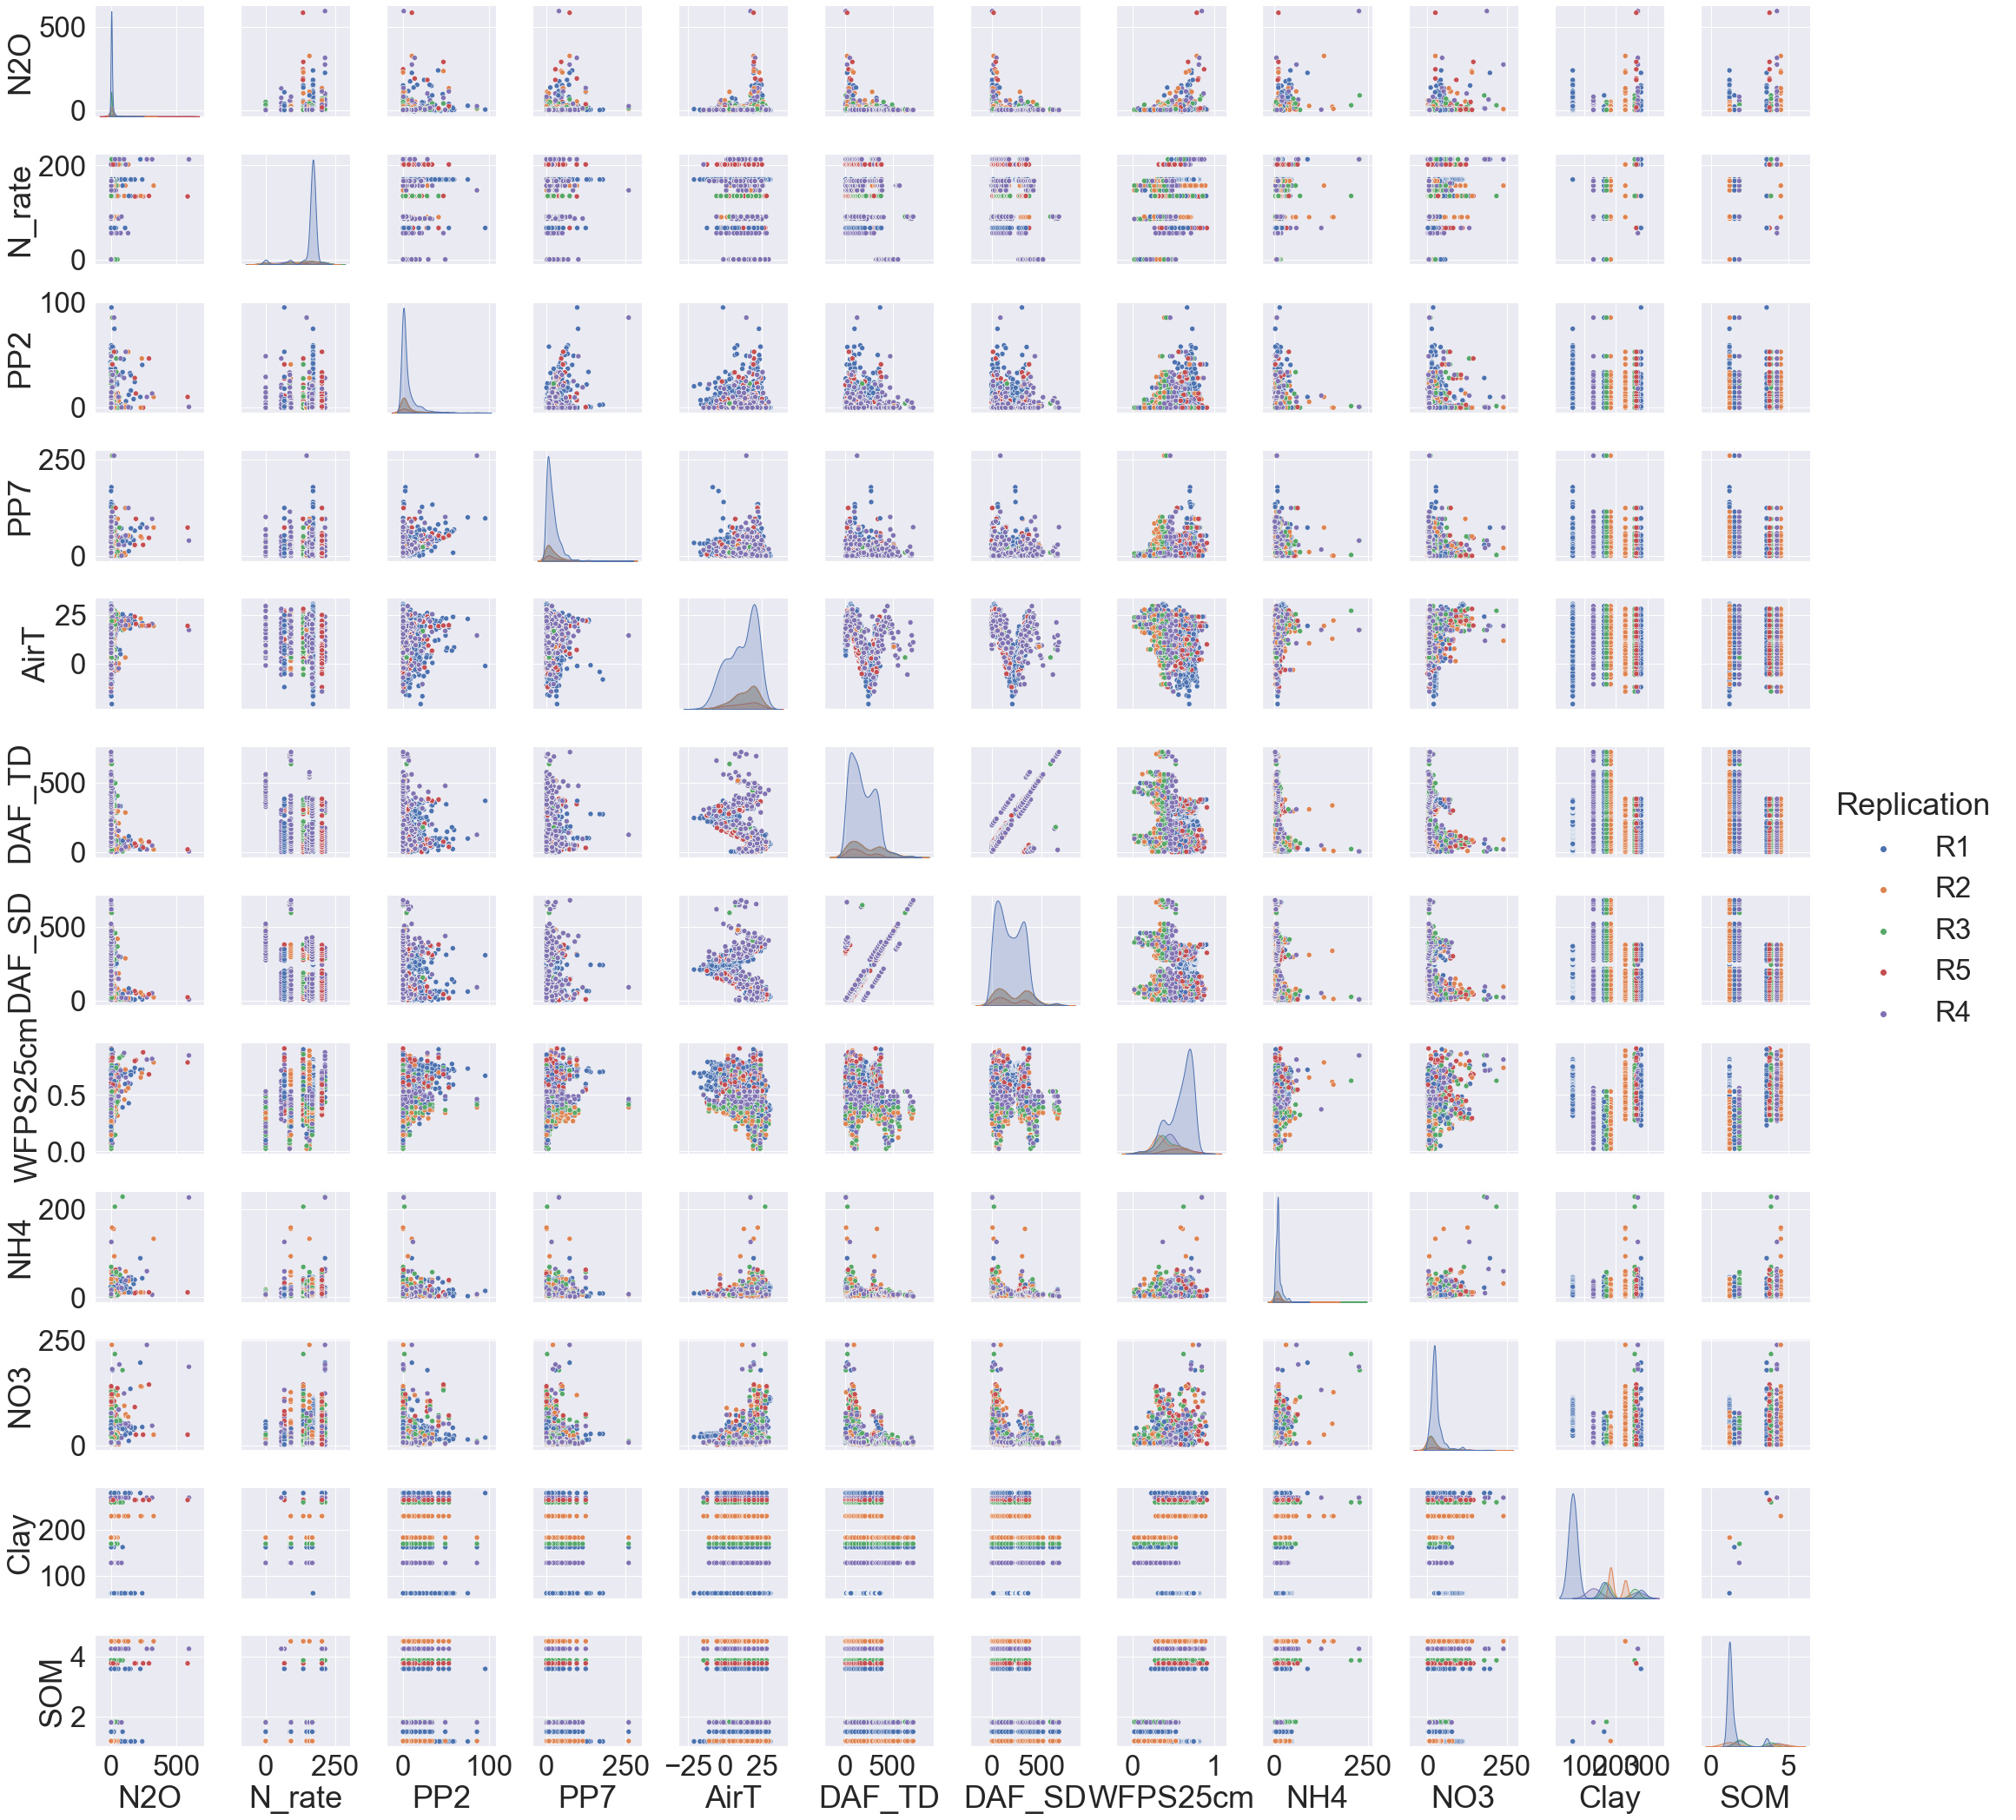

In [24]:
plt.figure(figsize=(17,12))
sns.set(font_scale=3)
sns.pairplot(
soil_data[['Replication', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'SOM']],
    hue="Replication", diag_kind='kde')

In [24]:
months_dict = {'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

crops_dict = {"Corn": 1, "GLYMX": 2, "TRIAE": 3}
datause_dict = {"Building": 1, "Testing": 0}

In [25]:
soil_data["Month"] = soil_data["Month"].apply(lambda x: months_dict[x])
soil_data["Vegetation"] = soil_data["Vegetation"].apply(lambda x: crops_dict[x])
soil_data["DataUse"] = soil_data["DataUse"].apply(lambda x: datause_dict[x])

In [26]:
soil_data.to_csv("soil_n2o_v0_encoded.csv", index=False)
soil_data

Date  Year  DataUse Replication  Month  Vegetation       N2O  \
0    2012-02-09  2012        1          R1      2           1  3.896742   
1    2012-02-10  2012        1          R1      2           1  2.190218   
2    2012-02-18  2012        1          R1      2           1  3.542594   
3    2012-02-19  2012        1          R1      2           1  3.342870   
4    2012-03-16  2012        1          R1      3           1  2.947778   
...         ...   ...      ...         ...    ...         ...       ...   
2241 2013-10-16  2013        0          R4     10           3  1.640000   
2242 2013-11-15  2013        0          R1     11           3  0.990000   
2243 2013-11-15  2013        0          R2     11           3 -0.200000   
2244 2013-11-15  2013        0          R3     11           3  0.300000   
2245 2013-11-15  2013        0          R4     11           3  0.400000   

      N_rate   PP2   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
0        170  0.00  0.00  -2.00     276     241  0.666508  11.046340   
1        170  0.00  0.00  -2.40     277     242  0.640608  11.008087   
2        170  3.30  8.64   0.30     285     250  0.728085  10.831669   
3        170  0.00  8.13  -3.80     286     251  0.686872  10.849792   
4        170  1.02  8.39  17.60     312     277  0.716221  10.204748   
...      ...   ...   ...    ...     ...     ...       ...        ...   
2241      91  3.81  8.13  10.81     167     167  0.390203  17.061793   
2242      91  0.00  8.13   5.64     197     197  0.317040   5.624730   
2243      91  0.00  8.13   5.64     197     197  0.341428   3.504328   
2244      91  0.00  8.13   5.64     197     197  0.365815   3.636931   
2245      91  0.00  8.13   5.64     197     197  0.341428   7.376583   

            NO3        Clay       SOM  
0     22.940812   62.500000  1.174072  
1     22.959578   62.500000  1.174072  
2     23.221928   62.500000  1.174072  
3     23.271978   62.500000  1.174072  
4     24.206855   62.500000  1.174072  
...         ...         ...       ...  
2241   5.803681  128.333333  1.806000  
2242   5.429873  162.500000  1.496400  
2243   7.239000  183.250000  1.186800  
2244   8.434294  169.833333  1.823200  
2245   6.645088  128.333333  1.806000  

[2246 rows x 18 columns]

In [27]:
soil_data_copy = soil_data.copy()
# soil_data_copy.drop(["Date"], axis=1, inplace=True)
replica_dict = {"R1": 1, "R2": 2, "R3": 3, "R4": 4, "R5": 5}
soil_data_copy["Replication"] = soil_data_copy["Replication"].apply(lambda x: replica_dict[x])
soil_data_copy

Date  Year  DataUse  Replication  Month  Vegetation       N2O  \
0    2012-02-09  2012        1            1      2           1  3.896742   
1    2012-02-10  2012        1            1      2           1  2.190218   
2    2012-02-18  2012        1            1      2           1  3.542594   
3    2012-02-19  2012        1            1      2           1  3.342870   
4    2012-03-16  2012        1            1      3           1  2.947778   
...         ...   ...      ...          ...    ...         ...       ...   
2241 2013-10-16  2013        0            4     10           3  1.640000   
2242 2013-11-15  2013        0            1     11           3  0.990000   
2243 2013-11-15  2013        0            2     11           3 -0.200000   
2244 2013-11-15  2013        0            3     11           3  0.300000   
2245 2013-11-15  2013        0            4     11           3  0.400000   

      N_rate   PP2   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
0        170  0.00  0.00  -2.00     276     241  0.666508  11.046340   
1        170  0.00  0.00  -2.40     277     242  0.640608  11.008087   
2        170  3.30  8.64   0.30     285     250  0.728085  10.831669   
3        170  0.00  8.13  -3.80     286     251  0.686872  10.849792   
4        170  1.02  8.39  17.60     312     277  0.716221  10.204748   
...      ...   ...   ...    ...     ...     ...       ...        ...   
2241      91  3.81  8.13  10.81     167     167  0.390203  17.061793   
2242      91  0.00  8.13   5.64     197     197  0.317040   5.624730   
2243      91  0.00  8.13   5.64     197     197  0.341428   3.504328   
2244      91  0.00  8.13   5.64     197     197  0.365815   3.636931   
2245      91  0.00  8.13   5.64     197     197  0.341428   7.376583   

            NO3        Clay       SOM  
0     22.940812   62.500000  1.174072  
1     22.959578   62.500000  1.174072  
2     23.221928   62.500000  1.174072  
3     23.271978   62.500000  1.174072  
4     24.206855   62.500000  1.174072  
...         ...         ...       ...  
2241   5.803681  128.333333  1.806000  
2242   5.429873  162.500000  1.496400  
2243   7.239000  183.250000  1.186800  
2244   8.434294  169.833333  1.823200  
2245   6.645088  128.333333  1.806000  

[2246 rows x 18 columns]

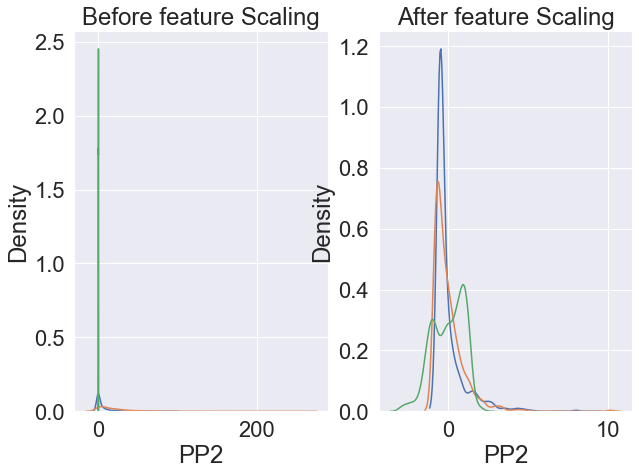

In [29]:
X_sample = soil_data_copy[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y_sample = soil_data_copy.drop(["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"], axis=1)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))
ax1.set_title('Before feature Scaling')
sns.kdeplot(X_sample["PP2"], ax=ax1)
sns.kdeplot(X_sample["PP7"], ax=ax1)
sns.kdeplot(X_sample["WFPS25cm"], ax=ax1)


sc = StandardScaler()
X_sample_scaled = pd.DataFrame(sc.fit_transform(X_sample), columns=X_sample.columns)

ax2.set_title('After feature Scaling')
sns.kdeplot(X_sample_scaled["PP2"], ax=ax2)
sns.kdeplot(X_sample_scaled["PP7"], ax=ax2)
sns.kdeplot(X_sample_scaled["WFPS25cm"], ax=ax2)
plt.show()

In [30]:
soil_data_copy.shape

(2246, 18)

In [31]:
scaled_data = pd.concat([X_sample_scaled, y_sample], axis=1)
soil_grp_sc = scaled_data.groupby("Date").mean()

soil_grp_sc

N_rate       PP2       PP7      AirT    DAF_TD    DAF_SD  \
Date                                                                     
2002-03-27  0.481233 -0.518774 -0.811416 -1.249858  1.109024  0.791611   
2002-04-10  0.481233  1.854142  0.275558 -0.499439  1.205654  0.889599   
2002-04-24  0.481233 -0.417798 -0.549578  0.059159  1.302284  0.987586   
2002-05-15  0.374315 -0.518774  0.858669  0.121342 -1.313617  1.134567   
2002-05-30  0.338676 -0.518774 -0.662024  1.010883 -1.210085  1.239553   
...              ...       ...       ...       ...       ...       ...   
2017-07-05  0.481233 -0.518774  0.242630  1.053042 -0.954707 -1.287120   
2017-07-06  0.481233 -0.518774  0.242630  1.168977 -0.947805 -1.280121   
2017-07-07  0.481233  0.375691 -0.347636  1.147898 -0.940903 -1.273122   
2017-07-08  0.481233  0.375691  0.031821  0.779013 -0.934001 -1.266123   
2017-07-09  0.481233  0.375691  0.031821  0.800092 -0.927099 -1.259123   

            WFPS25cm       NH4       NO3      Clay       SOM    Year  DataUse  \
Date                                                                            
2002-03-27 -0.947729 -0.469799 -0.883465  0.333815 -0.285530  2002.0      0.0   
2002-04-10 -0.677234 -0.390684 -0.839041  0.333815 -0.285530  2002.0      0.0   
2002-04-24 -1.157614 -0.347390 -0.840750  0.333815 -0.285530  2002.0      0.0   
2002-05-15 -1.052846 -0.231768 -0.641797  0.333815 -0.285530  2002.0      0.0   
2002-05-30 -1.526328 -0.132096 -0.123178  0.333815 -0.285530  2002.0      0.0   
...              ...       ...       ...       ...       ...     ...      ...   
2017-07-05 -0.037166  0.844516  0.372217 -0.904182 -0.642242  2017.0      1.0   
2017-07-06 -0.112985  0.642479  0.319283 -0.904182 -0.642242  2017.0      1.0   
2017-07-07 -0.162544  0.833101  0.345214 -0.904182 -0.642242  2017.0      1.0   
2017-07-08 -0.180028  0.928324  0.369233 -0.904182 -0.642242  2017.0      1.0   
2017-07-09 -0.223608  0.987867  0.417460 -0.904182 -0.642242  2017.0      1.0   

            Replication  Month  Vegetation        N2O  
Date                                                   
2002-03-27          2.5    3.0         1.0   0.307500  
2002-04-10          2.5    4.0         1.0   0.630000  
2002-04-24          2.5    4.0         1.0   0.610000  
2002-05-15          2.5    5.0         1.0   3.935000  
2002-05-30          2.5    5.0         1.0   1.760000  
...                 ...    ...         ...        ...  
2017-07-05          1.0    7.0         1.0  21.102827  
2017-07-06          1.0    7.0         1.0  22.966965  
2017-07-07          1.0    7.0         1.0  27.918279  
2017-07-08          1.0    7.0         1.0  25.631418  
2017-07-09          1.0    7.0         1.0  22.892078  

[1287 rows x 17 columns]

In [32]:
# This function will return r2 score for any/all of the 3 models mentioned
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        scores['xgb'] = r2_score(y_test, y_pred)
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestRegressor(n_estimators=200, criterion='mse')
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf'] = r2_score(y_test, y_pred)
        models.append(rf)

    if 'dtree' in kwargs.keys() and kwargs['dtree']:
        dtree = DecisionTreeRegressor(criterion='mse')
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)
        scores['dtree'] = r2_score(y_test, y_pred)
        models.append(dtree)
        
    return scores

In [33]:
X_sample = soil_grp_sc.drop("N2O", axis=1)
y_sample = soil_grp_sc["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.33, random_state=101)

modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.4472150982475498,
 'rf': 0.548462568426556,
 'dtree': 0.31364908528851043}

In [34]:
soil_group = soil_data.groupby("Date").mean()
soil_group

Year  DataUse  Month  Vegetation        N2O  N_rate     PP2  \
Date                                                                        
2002-03-27  2002.0      0.0    3.0         1.0   0.307500   170.0   0.000   
2002-04-10  2002.0      0.0    4.0         1.0   0.630000   170.0  23.876   
2002-04-24  2002.0      0.0    4.0         1.0   0.610000   170.0   1.016   
2002-05-15  2002.0      0.0    5.0         1.0   3.935000   164.0   0.000   
2002-05-30  2002.0      0.0    5.0         1.0   1.760000   162.0   0.000   
...            ...      ...    ...         ...        ...     ...     ...   
2017-07-05  2017.0      1.0    7.0         1.0  21.102827   170.0   0.000   
2017-07-06  2017.0      1.0    7.0         1.0  22.966965   170.0   0.000   
2017-07-07  2017.0      1.0    7.0         1.0  27.918279   170.0   9.000   
2017-07-08  2017.0      1.0    7.0         1.0  25.631418   170.0   9.000   
2017-07-09  2017.0      1.0    7.0         1.0  22.892078   170.0   9.000   

                PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  \
Date                                                                         
2002-03-27   0.0000   0.55   356.0   312.0  0.370097   5.350371   3.114477   
2002-04-10  25.7810   7.67   370.0   326.0  0.416034   6.377781   4.214812   
2002-04-24   6.2103  12.97   384.0   340.0  0.334452   6.940021   4.172479   
2002-05-15  39.6113  13.56     5.0   361.0  0.352245   8.441531   9.100344   
2002-05-30   3.5433  22.00    20.0   376.0  0.271834   9.735911  21.946054   
...             ...    ...     ...     ...       ...        ...        ...   
2017-07-05  25.0000  22.40    57.0    15.0  0.524735  22.418589  34.216524   
2017-07-06  25.0000  23.50    58.0    16.0  0.511859  19.794852  32.905413   
2017-07-07  11.0000  23.30    59.0    17.0  0.503443  22.270345  33.547679   
2017-07-08  20.0000  19.80    60.0    18.0  0.500473  23.506947  34.142608   
2017-07-09  20.0000  20.00    61.0    19.0  0.493072  24.280197  35.337144   

                  Clay       SOM  
Date                              
2002-03-27  160.979167  1.578100  
2002-04-10  160.979167  1.578100  
2002-04-24  160.979167  1.578100  
2002-05-15  160.979167  1.578100  
2002-05-30  160.979167  1.578100  
...                ...       ...  
2017-07-05   62.500000  1.174072  
2017-07-06   62.500000  1.174072  
2017-07-07   62.500000  1.174072  
2017-07-08   62.500000  1.174072  
2017-07-09   62.500000  1.174072  

[1287 rows x 16 columns]

In [35]:
soil_group.DataUse.value_counts()

1.000000    1115
0.000000     136
0.200000      32
0.555556       3
0.250000       1
Name: DataUse, dtype: int64

In [36]:
soil_group["DataUse"].apply(lambda x: round(x))

Date
2002-03-27    0
2002-04-10    0
2002-04-24    0
2002-05-15    0
2002-05-30    0
             ..
2017-07-05    1
2017-07-06    1
2017-07-07    1
2017-07-08    1
2017-07-09    1
Name: DataUse, Length: 1287, dtype: int64

In [37]:
soil_group.Vegetation.value_counts()

1.000000    1183
2.000000      43
3.000000      39
2.600000      10
1.800000       9
1.888889       1
1.444444       1
2.500000       1
Name: Vegetation, dtype: int64

In [38]:
soil_group["Vegetation"] = soil_group["Vegetation"].apply(lambda x: round(x))

In [39]:
soil_group["Vegetation"].value_counts()

1    1184
2      54
3      49
Name: Vegetation, dtype: int64

In [40]:
soil_data.groupby("Vegetation").count()

Date  Year  DataUse  Replication  Month   N2O  N_rate   PP2   PP7  \
Vegetation                                                                      
1           1845  1845     1845         1845   1845  1845    1845  1845  1845   
2            204   204      204          204    204   204     204   204   204   
3            197   197      197          197    197   197     197   197   197   

            AirT  DAF_TD  DAF_SD  WFPS25cm   NH4   NO3  Clay   SOM  
Vegetation                                                          
1           1845    1845    1845      1845  1845  1845  1845  1845  
2            204     204     204       204   204   204   204   204  
3            197     197     197       197   197   197   197   197

In [41]:
soil_group[["Year", "DataUse", "Month"]] = soil_group[["Year", "DataUse", "Month"]].astype(int)

In [42]:
soil_group.groupby("Vegetation").count()

Year  DataUse  Month   N2O  N_rate   PP2   PP7  AirT  DAF_TD  \
Vegetation                                                                 
1           1184     1184   1184  1184    1184  1184  1184  1184    1184   
2             54       54     54    54      54    54    54    54      54   
3             49       49     49    49      49    49    49    49      49   

            DAF_SD  WFPS25cm   NH4   NO3  Clay   SOM  
Vegetation                                            
1             1184      1184  1184  1184  1184  1184  
2               54        54    54    54    54    54  
3               49        49    49    49    49    49

In [43]:
soil_group

Year  DataUse  Month  Vegetation        N2O  N_rate     PP2  \
Date                                                                      
2002-03-27  2002        0      3           1   0.307500   170.0   0.000   
2002-04-10  2002        0      4           1   0.630000   170.0  23.876   
2002-04-24  2002        0      4           1   0.610000   170.0   1.016   
2002-05-15  2002        0      5           1   3.935000   164.0   0.000   
2002-05-30  2002        0      5           1   1.760000   162.0   0.000   
...          ...      ...    ...         ...        ...     ...     ...   
2017-07-05  2017        1      7           1  21.102827   170.0   0.000   
2017-07-06  2017        1      7           1  22.966965   170.0   0.000   
2017-07-07  2017        1      7           1  27.918279   170.0   9.000   
2017-07-08  2017        1      7           1  25.631418   170.0   9.000   
2017-07-09  2017        1      7           1  22.892078   170.0   9.000   

                PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  \
Date                                                                         
2002-03-27   0.0000   0.55   356.0   312.0  0.370097   5.350371   3.114477   
2002-04-10  25.7810   7.67   370.0   326.0  0.416034   6.377781   4.214812   
2002-04-24   6.2103  12.97   384.0   340.0  0.334452   6.940021   4.172479   
2002-05-15  39.6113  13.56     5.0   361.0  0.352245   8.441531   9.100344   
2002-05-30   3.5433  22.00    20.0   376.0  0.271834   9.735911  21.946054   
...             ...    ...     ...     ...       ...        ...        ...   
2017-07-05  25.0000  22.40    57.0    15.0  0.524735  22.418589  34.216524   
2017-07-06  25.0000  23.50    58.0    16.0  0.511859  19.794852  32.905413   
2017-07-07  11.0000  23.30    59.0    17.0  0.503443  22.270345  33.547679   
2017-07-08  20.0000  19.80    60.0    18.0  0.500473  23.506947  34.142608   
2017-07-09  20.0000  20.00    61.0    19.0  0.493072  24.280197  35.337144   

                  Clay       SOM  
Date                              
2002-03-27  160.979167  1.578100  
2002-04-10  160.979167  1.578100  
2002-04-24  160.979167  1.578100  
2002-05-15  160.979167  1.578100  
2002-05-30  160.979167  1.578100  
...                ...       ...  
2017-07-05   62.500000  1.174072  
2017-07-06   62.500000  1.174072  
2017-07-07   62.500000  1.174072  
2017-07-08   62.500000  1.174072  
2017-07-09   62.500000  1.174072  

[1287 rows x 16 columns]

In [44]:
soil_group.reset_index(drop=True, inplace=True)

In [45]:
soil_group.to_csv("soil_n20_data_preprocessed_reduced.csv", index=False)
soil_group

Year  DataUse  Month  Vegetation        N2O  N_rate     PP2      PP7  \
0     2002        0      3           1   0.307500   170.0   0.000   0.0000   
1     2002        0      4           1   0.630000   170.0  23.876  25.7810   
2     2002        0      4           1   0.610000   170.0   1.016   6.2103   
3     2002        0      5           1   3.935000   164.0   0.000  39.6113   
4     2002        0      5           1   1.760000   162.0   0.000   3.5433   
...    ...      ...    ...         ...        ...     ...     ...      ...   
1282  2017        1      7           1  21.102827   170.0   0.000  25.0000   
1283  2017        1      7           1  22.966965   170.0   0.000  25.0000   
1284  2017        1      7           1  27.918279   170.0   9.000  11.0000   
1285  2017        1      7           1  25.631418   170.0   9.000  20.0000   
1286  2017        1      7           1  22.892078   170.0   9.000  20.0000   

       AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3        Clay  \
0      0.55   356.0   312.0  0.370097   5.350371   3.114477  160.979167   
1      7.67   370.0   326.0  0.416034   6.377781   4.214812  160.979167   
2     12.97   384.0   340.0  0.334452   6.940021   4.172479  160.979167   
3     13.56     5.0   361.0  0.352245   8.441531   9.100344  160.979167   
4     22.00    20.0   376.0  0.271834   9.735911  21.946054  160.979167   
...     ...     ...     ...       ...        ...        ...         ...   
1282  22.40    57.0    15.0  0.524735  22.418589  34.216524   62.500000   
1283  23.50    58.0    16.0  0.511859  19.794852  32.905413   62.500000   
1284  23.30    59.0    17.0  0.503443  22.270345  33.547679   62.500000   
1285  19.80    60.0    18.0  0.500473  23.506947  34.142608   62.500000   
1286  20.00    61.0    19.0  0.493072  24.280197  35.337144   62.500000   

           SOM  
0     1.578100  
1     1.578100  
2     1.578100  
3     1.578100  
4     1.578100  
...        ...  
1282  1.174072  
1283  1.174072  
1284  1.174072  
1285  1.174072  
1286  1.174072  

[1287 rows x 16 columns]

In [46]:
X = soil_group.drop(["N2O"], axis=1)
y = soil_group["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.2718767599558246,
 'rf': 0.5362767490702994,
 'dtree': 0.2625821242675662}

In [47]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr


def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    x = [i for i in range(len(fs_func.scores_))]
    y = fs_func.scores_
    plt.bar(x, y)
    plt.xticks(x, X_train.columns.to_list(), fontsize=12, rotation=90)
    plt.show()

def select_features_model_based(estimator, X_train, y_train, X_test, n=None):
    
    rfe = RFE(estimator=estimator, n_features_to_select=n)
    rfe.fit(X_train,y_train)
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    return X_train_rfe, X_test_rfe, rfe

def rfe_score_plot(rfe):

    plt.figure(figsize=(7,5))
    sns.barplot(y =X_train.columns, x = max(rfe.ranking_) - rfe.ranking_)
    plt.show()

Feature 0: 0.134523
Feature 1: 0.683631
Feature 2: 4.349457
Feature 3: 0.566144
Feature 4: 0.828536
Feature 5: 56.259621
Feature 6: 42.250818
Feature 7: 20.297641
Feature 8: 17.416753
Feature 9: 27.378170
Feature 10: 4.477092
Feature 11: 195.852670
Feature 12: 38.778297
Feature 13: 4.723587
Feature 14: 8.893070


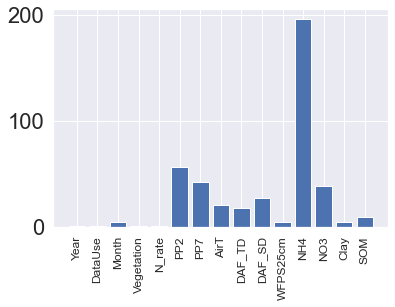

array([0.63583454, 0.56293611, 0.31115141])

In [48]:
X_train_fs, X_test_fs, fs_ = select_features_corr_based(X_train, y_train, X_test, x=7)
fs_score_plot(fs_)

cv = cross_val_score(XGBRegressor(), X_train_fs, y_train, scoring='r2', cv=3, n_jobs=-1)
cv

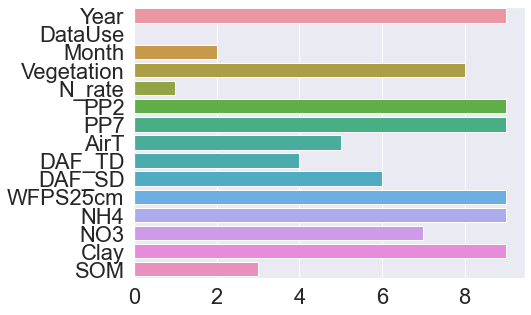

array([0.70472053, 0.46484664, 0.31686472])

In [49]:
X_train_rfe, X_test_rfe, rfe_ = select_features_model_based(XGBRegressor(), X_train, y_train, X_test, n=6)
plt.figure(figsize=(7,5))
sns.barplot(y =X_train.columns, x = max(rfe_.ranking_) - rfe_.ranking_)
plt.show()

cv = cross_val_score(XGBRegressor(), X_train_rfe, y_train, scoring='r2', cv=3, n_jobs=-1)
cv

In [50]:
print(modelling(X_train_fs, y_train, X_test_fs, y_test, xgb=True, rf=True, dtree=True))
print(modelling(X_train_rfe, y_train, X_test_rfe, y_test, xgb=True, rf=True, dtree=True))

{'xgb': 0.4036719132797275, 'rf': 0.4345628592018752, 'dtree': -0.27641069107949456}
{'xgb': 0.37542653272613413, 'rf': 0.6019137185739456, 'dtree': 0.33378887296267234}


In [51]:
len(max(rfe_.ranking_) - rfe_.ranking_)

15

In [52]:
major = soil_group.drop(["Vegetation"], axis=1)
minor = soil_group["Vegetation"]

counter = Counter(minor)

for k,v in counter.items():
	per = v / len(minor) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=1184 (91.997%)
Class=2, n=54 (4.196%)
Class=3, n=49 (3.807%)


In [53]:
oversample = SMOTE()
major, minor = oversample.fit_resample(major, minor)
# summarize distribution
counter = Counter(minor)
for k,v in counter.items():
    per = v / len(minor) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=1184 (33.333%)
Class=2, n=1184 (33.333%)
Class=3, n=1184 (33.333%)


In [54]:
soil_balanced = pd.concat([major,minor], axis=1)
soil_balanced

Year  DataUse  Month       N2O      N_rate        PP2        PP7  \
0     2002        0      3  0.307500  170.000000   0.000000   0.000000   
1     2002        0      4  0.630000  170.000000  23.876000  25.781000   
2     2002        0      4  0.610000  170.000000   1.016000   6.210300   
3     2002        0      5  3.935000  164.000000   0.000000  39.611300   
4     2002        0      5  1.760000  162.000000   0.000000   3.543300   
...    ...      ...    ...       ...         ...        ...        ...   
3547  2010        0      5  2.950130   87.000000  10.946061  89.082256   
3548  2007        0      5  5.600052   86.000000   0.000000   0.000000   
3549  2011        0      4  1.528383   88.534627   1.853062   3.046067   
3550  2010        0      6  5.376275   87.000000  20.486010  69.258773   
3551  2005        0      2  4.131527   93.286564   8.443966  21.073231   

           AirT      DAF_TD      DAF_SD  WFPS25cm        NH4        NO3  \
0      0.550000  356.000000  312.000000  0.370097   5.350371   3.114477   
1      7.670000  370.000000  326.000000  0.416034   6.377781   4.214812   
2     12.970000  384.000000  340.000000  0.334452   6.940021   4.172479   
3     13.560000    5.000000  361.000000  0.352245   8.441531   9.100344   
4     22.000000   20.000000  376.000000  0.271834   9.735911  21.946054   
...         ...         ...         ...       ...        ...        ...   
3547  18.708605   48.742346   39.742346  0.397829   2.959363   5.676405   
3548  18.715159   40.867437   15.867437  0.299406  14.380819  15.628616   
3549  11.657228  703.383657  665.232687  0.344189   5.784244  13.307107   
3550  20.429958   58.026593   49.026593  0.408540   2.640303   4.321535   
3551   9.895319  250.068577  615.706414  0.442133   4.886597   6.250678   

            Clay       SOM  Vegetation  
0     160.979167  1.578100           1  
1     160.979167  1.578100           1  
2     160.979167  1.578100           1  
3     160.979167  1.578100           1  
4     160.979167  1.578100           1  
...          ...       ...         ...  
3547  160.979167  1.578100           3  
3548  160.979167  1.578100           3  
3549  160.979167  1.578100           3  
3550  160.979167  1.578100           3  
3551  157.126094  1.562292           3  

[3552 rows x 16 columns]

In [57]:
X = soil_balanced.drop("N2O", axis=1)
y = soil_balanced["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

r2 score for base model: 0.703446


<AxesSubplot:>

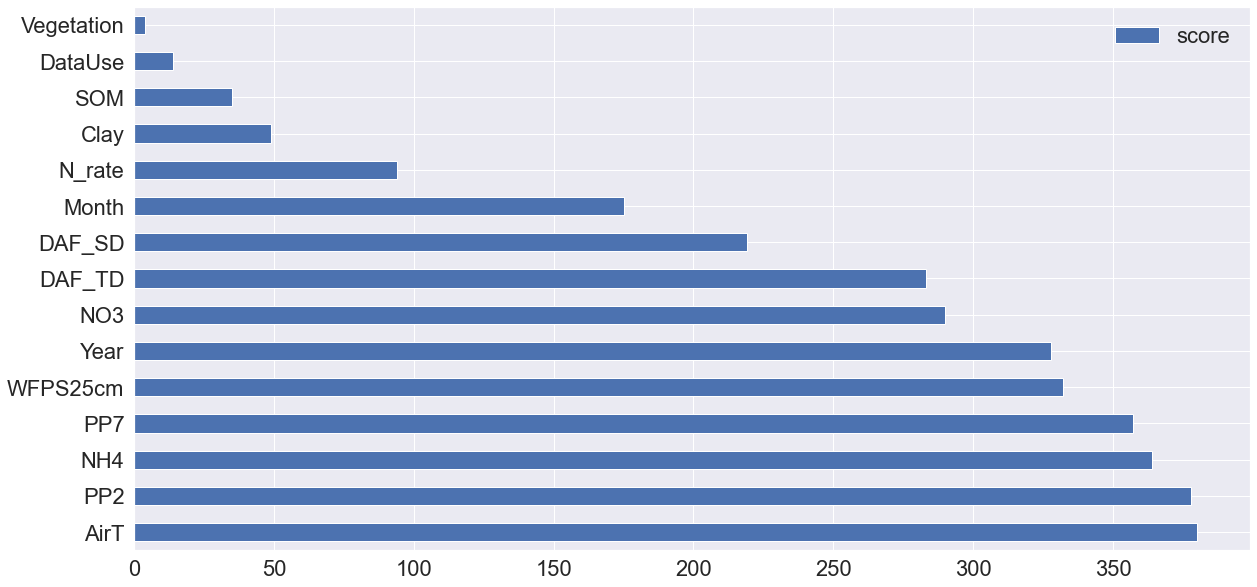

In [58]:
boost = XGBRegressor()
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
print("r2 score for base model: %f" % r2_score(y_test, y_pred))

feature_important = boost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh', figsize = (20,10))

In [59]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.7034460636687756,
 'rf': 0.7100175038165857,
 'dtree': 0.3872798613512919}

In [60]:
feats = data.index[:10].to_list()
feats

['AirT',
 'PP2',
 'NH4',
 'PP7',
 'WFPS25cm',
 'Year',
 'NO3',
 'DAF_TD',
 'DAF_SD',
 'Month']

In [61]:
X_train_sel = X_train[feats]
x_test_sel = X_test[feats]

cv = RepeatedKFold(n_splits= 78, n_repeats = 3, random_state = 1)

grid_params_xgb = [{ 'n_estimators': [100, 200],
                   'model__max_depth': [9,12],
                   'model__min_child_weight': [7,8],
                   'model__subsample': [i/10 for i in range(9,11)]
                    }]

XGB = GridSearchCV(estimator=boost,
            param_grid=grid_params_xgb,
            scoring='r2',
            cv=cv, 
            n_jobs= -1,
            verbose=10)


XGB.fit(X_train_sel, y_train)

Fitting 234 folds for each of 16 candidates, totalling 3744 fits
[00:37:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { model__max_depth, model__min_child_weight, model__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=78, random_state=1),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
     

In [63]:
XGB.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, model__max_depth=9,
             model__min_child_weight=7, model__subsample=0.9,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
print('Best MAE: %.3f' % XGB.best_score_) # model__max_depth=12, model__min_child_weight=8, model__subsample=1.0, n_estimators=200
boost_final = XGB.best_estimator_

Best MAE: 0.302


In [65]:
y_hat = boost_final.predict(x_test_sel)
print(f'Training score : {XGB.score(X_train_sel,y_train)}')

# print()
print('r2 score:', r2_score(y_test, y_hat))
print('MAE:', mean_absolute_error(y_test, y_hat))
print('MSE:', mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hat)))

Training score : 0.9998663206432841
r2 score: 0.7086314993720504
MAE: 1.9665124735065167
MSE: 53.893231291474656
RMSE: 7.341200943406648


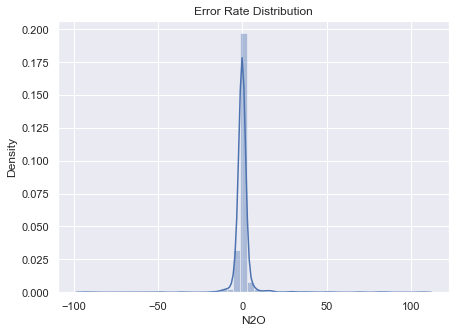

In [66]:
plt.figure(figsize = (7,5))
sns.set()
sns.distplot(y_test - y_hat)
plt.title("Error Rate Distribution");

In [67]:
import pickle
file = open('n2opredictor_new.pkl','wb')
pickle.dump(boost_final,file)
file.close()

In [83]:
X_train[feats].head(3)

AirT  PP2        NH4   PP7  WFPS25cm  Year        NO3      DAF_TD  \
929    7.800000  0.0  10.491171   4.0  0.673663  2016  23.655971  294.000000   
3241  11.380519  0.0  17.294783   0.0  0.407638  2007  15.080352   28.760274   
1281  21.700000  3.0  24.802769  25.0  0.536383  2017  35.379119   56.000000   

          DAF_SD  Month  
929   247.000000      2  
3241    3.760274      4  
1281   14.000000      7

In [85]:
X_train_sel = X_train[feats].values
x_test_sel = X_test[feats].values

In [89]:
x_test_sel[0].shape

(10,)

In [90]:
boost_final.fit(X_train_sel,y_train)
y_hat = boost_final.predict(x_test_sel)
print(f'Training score : {boost_final.score(X_train_sel,y_train)}')

# print()
print('r2 score:', r2_score(y_test, y_hat))
print('MAE:', mean_absolute_error(y_test, y_hat))
print('MSE:', mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hat)))

[01:15:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { model__max_depth, model__min_child_weight, model__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training score : 0.9998663206432841
r2 score: 0.7086314993720504
MAE: 1.9665124735065167
MSE: 53.893231291474656
RMSE: 7.341200943406648


In [100]:
X_train_sel[0]

array([7.80000000e+00, 0.00000000e+00, 1.04911710e+01, 4.00000000e+00,
       6.73663451e-01, 2.01600000e+03, 2.36559710e+01, 2.94000000e+02,
       2.47000000e+02, 2.00000000e+00])

In [98]:
boost_final.predict(np.array([[16.31,19,7,19,0.33,2007,12,178,156,9]]))

array([1.7406485], dtype=float32)

In [97]:
import pickle
file = open('n2opredictor_new1.pkl','wb')
pickle.dump(boost_final,file)
file.close()